### This notebook generates the 6 first figures of the paper. 

In [1]:
import networkit as nk
import networkx as nx
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.rcParams['mathtext.fontset'] = 'custom'
#matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
#matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
#matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
usetex=False
import math
import pandas as pd
import re

In [2]:
def extract_last_number_from_file(file_path):
    try:
        with open(file_path, 'r') as file:
            file_contents = file.read()

        # Use a regular expression to find the last number in the text
        match = re.search(r'Final optimal gap: (\d+\.\d+)', file_contents)
        if match:
            last_number = float(match.group(1))
            return last_number
        else:
            return None

    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [3]:
def sort_file_by_column(input_file):
    # Read the contents of the input file
    with open(input_file, 'r') as f:
        lines = f.readlines()

    # Sort the lines based on the value in the 4th column
    sorted_lines = sorted(lines, key=lambda line: float(line.split('\t')[3]))

    # Write the sorted lines to the output file
    with open(input_file, 'w') as f:
        f.writelines(sorted_lines)

def floor_vector(input_vector):
    return [math.floor(x) for x in input_vector]

# FIGURE 1

In [4]:
N = 500
Number_of_Ms = 25
degree = 3

def round_to_even(values):
    rounded_values = [x if x % 2 == 0 else x - 1 for x in values]
    return rounded_values

list_of_Ms_prime = np.linspace(0,1,Number_of_Ms)
for m in range(len(list_of_Ms_prime)):
    list_of_Ms_prime[m] = list_of_Ms_prime[m]**2
list_of_Ms = (2*N*degree/np.log10(N))*list_of_Ms_prime
list_of_Ms = np.round(list_of_Ms)
list_of_Ms = round_to_even(list_of_Ms)
list_of_Ms = [num for num in list_of_Ms if num != 0] 
list_of_Ms = list(set(list_of_Ms)) 
list_of_Ms = np.sort(list_of_Ms)

In [5]:
final_tab_of_energies_FW = []
final_tab_of_energies_FW_std = []

final_tab_of_energies_FW_int = []
final_tab_of_energies_FW_int_std = []

final_tab_of_energies_GP = []
final_tab_of_energies_GP_std = []

final_tab_of_energies_MCMC = []
final_tab_of_energies_MCMC_std = []

final_tab_of_energies_BP = []
final_tab_of_energies_BP_std = []

for element_M in list_of_Ms:
    element_M = math.floor(element_M)

    indices_FW = []
    energies_FW = []
    energies_FWint = []
    with open('results/data_6_first_figures/Figure_1_data/Results_N=500_d=3/Results_new_FW_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_FW = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_FW.append(third_column)
            energies_FW.append(float(fifth_column_FW))
            energies_FWint.append(float(columns[5]))

    data_FW = {
        'Seed': indices_FW,
        'ResultFW': energies_FW
    }

    data_FWint = {
        'Seed': indices_FW,
        'ResultFWint': energies_FWint
    }

    indices_BP = []
    energies_BP = []
    with open('results/data_6_first_figures/Figure_1_data/Results_N=500_d=3/Results_BP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_BP = columns[4]  # Indexing starts from 0
            third_column_BP = columns[3]
            indices_BP.append(third_column_BP)
            energies_BP.append(float(fifth_column_BP))

    data_BP = {
        'Seed': indices_BP,
        'ResultBP': energies_BP
    }


    indices_GP = []
    energies_GP = []
    with open('results/data_6_first_figures/Figure_1_data/Results_N=500_d=3/Results_GP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_GP = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_GP.append(third_column)
            energies_GP.append(float(fifth_column_GP))

    data_GP = {
        'Seed': indices_GP,
        'ResultGP': energies_GP
    }


    indices_MCMC = []
    energies_MCMC = []
    with open('results/data_6_first_figures/Figure_1_data/Results_N=500_d=3/Results_MCMC_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_MCMC = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_MCMC.append(third_column)
            energies_MCMC.append(float(fifth_column_MCMC))

    data_MCMC = {
        'Seed': indices_MCMC,
        'ResultMCMC': energies_MCMC
    }

    indices_SP = []
    energies_SP = []
    with open('results/data_6_first_figures/Figure_1_data/Results_N=500_d=3/Results_SP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_SP = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_SP.append(third_column)
            energies_SP.append(float(fifth_column_SP))

    data_SP = {
        'Seed': indices_SP,
        'ResultSP': energies_SP
    }

    data_SP_ = pd.DataFrame(data_SP)
    data_GP_ = pd.DataFrame(data_GP)
    data_FW_ = pd.DataFrame(data_FW)
    data_FWint_ = pd.DataFrame(data_FWint)
    data_MCMC_ = pd.DataFrame(data_MCMC)
    data_BP_ = pd.DataFrame(data_BP)

    merged_df1 = pd.merge(data_SP_, data_GP_, on='Seed')
    merged_df2 = pd.merge(merged_df1, data_FW_, on='Seed')
    merged_df4 = pd.merge(merged_df2, data_FWint_, on='Seed')
    merged_df5 = pd.merge(merged_df4, data_MCMC_, on='Seed')
    merged_df = pd.merge(merged_df5, data_BP_, on='Seed')

    energies_FW = merged_df['ResultFW'].tolist()
    energies_FWint = merged_df['ResultFWint'].tolist()
    energies_GP = merged_df['ResultGP'].tolist()
    energies_SP = merged_df['ResultSP'].tolist()
    energies_SP_for_BP = merged_df['ResultSP'].tolist()
    energies_BP_for_BP = merged_df['ResultBP'].tolist()

    energies_MCMC = merged_df['ResultMCMC'].tolist()
    seeds = merged_df["Seed"].tolist()

    normalized_GP_energies = []
    for i in range(len(energies_GP)):
        normalized_GP_energies.append((energies_SP[i]-energies_GP[i]) / energies_SP[i])

    normalized_MCMC_energies = []
    for i in range(len(energies_MCMC)):
        normalized_MCMC_energies.append((energies_SP[i]-energies_MCMC[i]) / energies_SP[i])

    normalized_BP_energies = []
    for i in range(len(energies_BP_for_BP)): 
        normalized_BP_energies.append((energies_SP_for_BP[i]-energies_BP_for_BP[i]) / energies_SP_for_BP[i])

    normalized_FW_energies = []
    normalized_FWint_energies = []

    for i in range(len(energies_FW)):
        normalized_FW_energies.append((energies_SP[i]-energies_FW[i]) / energies_SP[i])
        normalized_FWint_energies.append((energies_SP[i]-energies_FWint[i]) / energies_SP[i])
        
    final_tab_of_energies_GP.append(np.mean(normalized_GP_energies))
    final_tab_of_energies_GP_std.append(np.std(normalized_GP_energies)/np.sqrt(len(normalized_GP_energies)))

    final_tab_of_energies_BP.append(np.mean(normalized_BP_energies))
    final_tab_of_energies_BP_std.append(np.std(normalized_BP_energies)/np.sqrt(len(normalized_BP_energies)))

    final_tab_of_energies_MCMC.append(np.mean(normalized_MCMC_energies))
    final_tab_of_energies_MCMC_std.append(np.std(normalized_MCMC_energies)/np.sqrt(len(normalized_MCMC_energies)))

    final_tab_of_energies_FW.append(np.mean(normalized_FW_energies))
    final_tab_of_energies_FW_std.append(np.std(normalized_FW_energies)/np.sqrt(len(normalized_FW_energies)))

    final_tab_of_energies_FW_int.append(np.mean(normalized_FWint_energies))
    final_tab_of_energies_FW_int_std.append(np.std(normalized_FWint_energies)/np.sqrt(len(normalized_FWint_energies)))

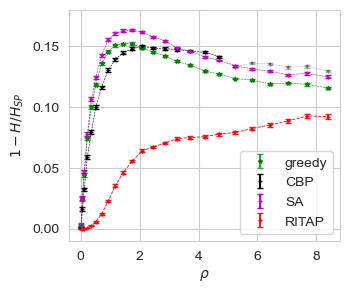

In [7]:
import matplotlib
matplotlib.rcParams.update({'text.usetex':usetex,'font.size':10})
plt.figure(figsize=(3.5, 3))
markersize_ = 3
list_of_Ms = np.array(list_of_Ms)
cap = 2
plt.grid()
plt.errorbar(2*list_of_Ms*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_GP, yerr=final_tab_of_energies_GP_std, fmt='*', color='g', ecolor='tab:green',markersize=markersize_, capsize=cap, label='greedy')
plt.errorbar(2*list_of_Ms[:18]*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_BP[:18], yerr=final_tab_of_energies_BP_std[:18], fmt='+', color='black', ecolor='black',markersize=markersize_, capsize=cap, label='CBP')
plt.errorbar(2*list_of_Ms[-len(final_tab_of_energies_BP)+18:]*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_BP[-len(final_tab_of_energies_BP)+18:], yerr=final_tab_of_energies_BP_std[-len(final_tab_of_energies_BP)+18:], fmt='+', color='black',alpha=0.3, ecolor='black',markersize=markersize_, capsize=cap)
plt.errorbar(2*list_of_Ms*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_MCMC, yerr=final_tab_of_energies_MCMC_std, fmt='+', color='m', ecolor='m',markersize=markersize_, capsize=cap, label='SA')
plt.errorbar(2*list_of_Ms*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_FW_int, yerr=final_tab_of_energies_FW_int_std, fmt='+', color='r', ecolor='tab:red',markersize=markersize_, capsize=cap, label='RITAP')

line =0.4
plt.plot(2*list_of_Ms*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_GP, linestyle='--', color='g',linewidth=line)
plt.plot(2*list_of_Ms[:18]*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_BP[:18], linestyle='--', color='black',linewidth=line)
plt.plot(2*list_of_Ms[-len(final_tab_of_energies_BP)+17:]*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_BP[-len(final_tab_of_energies_BP)+17:], linestyle='--',alpha=0.3, color='black',linewidth=line)
plt.plot(2*list_of_Ms*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_MCMC, linestyle='--', color='m',linewidth=line)
plt.plot(2*list_of_Ms*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_FW_int, linestyle='--', color='r',linewidth=line+0.2)

size_ = 15
plt.xlabel(r'$\rho$')
plt.ylabel(r'$1-H/H_{SP}$')
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=6)
plt.legend()
plt.ylim([-0.01,0.18])
plt.grid()
plt.savefig("results/pics/Figure_1.pdf", bbox_inches='tight',dpi=500)
plt.show()


# FIGURE 2

In [8]:
N = 200
Number_of_Ms = 25
degree = 3

def round_to_even(values):
    rounded_values = [x if x % 2 == 0 else x - 1 for x in values]
    return rounded_values

list_of_Ms200 = np.linspace(0,1,Number_of_Ms)
for m in range(len(list_of_Ms200)):
    list_of_Ms200[m] = list_of_Ms200[m]**2
list_of_Ms200 = (2*N*degree/np.log10(N))*list_of_Ms200
list_of_Ms200 = np.round(list_of_Ms200)
list_of_Ms200 = round_to_even(list_of_Ms200)
list_of_Ms200 = [num for num in list_of_Ms200 if num != 0] 
list_of_Ms200 = list(set(list_of_Ms200)) 
list_of_Ms200 = np.sort(list_of_Ms200)

In [9]:

final_tab_of_energies_GP200 = []
final_tab_of_energies_GP200_std = []

final_tab_of_energies_MCMC200 = []
final_tab_of_energies_MCMC200_std = []

final_tab_of_energies_BP200 = []
final_tab_of_energies_BP200_std = []

final_tab_of_energies_FW200 = []
final_tab_of_energies_FW200_std = []

for element_M in list_of_Ms200:
    element_M = math.floor(element_M)

    indices_FW = []
    energies_FW = []
    with open('results/data_6_first_figures/Figure_2_data/Results_N=200_d=3/Results_new_FW_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_FW = columns[5]  # Indexing starts from 0
            third_column_FW = columns[3]
            indices_FW.append(third_column_FW)
            energies_FW.append(float(fifth_column_FW))
    data_FW = {
        'Seed': indices_FW,
        'ResultFW': energies_FW
    }

    indices_BP = []
    energies_BP = []
    with open('results/data_6_first_figures/Figure_2_data/Results_N=200_d=3/Results_BP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_BP = columns[4]  # Indexing starts from 0
            third_column_BP = columns[3]
            indices_BP.append(third_column_BP)
            energies_BP.append(float(fifth_column_BP))

    data_BP = {
        'Seed': indices_BP,
        'ResultBP': energies_BP
    }

    indices_GP = []
    energies_GP = []
    with open('results/data_6_first_figures/Figure_2_data/Results_N=200_d=3/Results_GP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_GP = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_GP.append(third_column)
            energies_GP.append(float(fifth_column_GP))

    data_GP = {
        'Seed': indices_GP,
        'ResultGP': energies_GP
    }

    indices_MCMC = []
    energies_MCMC = []
    with open('results/data_6_first_figures/Figure_2_data/Results_N=200_d=3/Results_MCMC_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_MCMC = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_MCMC.append(third_column)
            energies_MCMC.append(float(fifth_column_MCMC))

    data_MCMC = {
        'Seed': indices_MCMC,
        'ResultMCMC': energies_MCMC
    }

    indices_SP = []
    energies_SP = []
    with open('results/data_6_first_figures/Figure_2_data/Results_N=200_d=3/Results_SP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_SP = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_SP.append(third_column)
            energies_SP.append(float(fifth_column_SP))

    data_SP = {
        'Seed': indices_SP,
        'ResultSP': energies_SP
    }

    data_SP_ = pd.DataFrame(data_SP)
    data_GP_ = pd.DataFrame(data_GP)
    data_MCMC_ = pd.DataFrame(data_MCMC)
    data_BP_ = pd.DataFrame(data_BP)
    data_FW_ = pd.DataFrame(data_FW)
    merged_df1 = pd.merge(data_SP_, data_GP_, on='Seed')
    merged_df3 = pd.merge(merged_df1, data_BP_, on='Seed')
    merged_df = pd.merge(merged_df3, data_FW_, on='Seed')

    merged_df = pd.merge(merged_df, data_MCMC_, on='Seed')    

    energies_GP = merged_df['ResultGP'].tolist()
    energies_SP = merged_df['ResultSP'].tolist()
    energies_BP = merged_df['ResultBP'].tolist()
    energies_MCMC = merged_df['ResultMCMC'].tolist()
    energies_FW = merged_df['ResultFW'].tolist()
    seeds = merged_df["Seed"].tolist()

    normalized_GP_energies = []
    for i in range(len(energies_GP)):
        normalized_GP_energies.append((energies_SP[i]-energies_GP[i]) / energies_SP[i])

    normalized_MCMC_energies = []
    for i in range(len(energies_MCMC)):
        normalized_MCMC_energies.append((energies_SP[i]-energies_MCMC[i]) / energies_SP[i])

    normalized_BP_energies = []
    for i in range(len(energies_BP)):
        normalized_BP_energies.append((energies_SP[i]-energies_BP[i]) / energies_SP[i])

    normalized_FW_energies = []
    for i in range(len(energies_FW)):
        normalized_FW_energies.append((energies_SP[i]-energies_FW[i]) / energies_SP[i])

    final_tab_of_energies_GP200.append(np.mean(normalized_GP_energies))
    final_tab_of_energies_GP200_std.append(np.std(normalized_GP_energies)/np.sqrt(len(normalized_GP_energies)))

    final_tab_of_energies_BP200.append(np.mean(normalized_BP_energies))
    final_tab_of_energies_BP200_std.append(np.std(normalized_BP_energies)/np.sqrt(len(normalized_BP_energies)))

    final_tab_of_energies_MCMC200.append(np.mean(normalized_MCMC_energies))
    final_tab_of_energies_MCMC200_std.append(np.std(normalized_MCMC_energies)/np.sqrt(len(normalized_MCMC_energies)))

    final_tab_of_energies_FW200.append(np.mean(normalized_FW_energies))
    final_tab_of_energies_FW200_std.append(np.std(normalized_FW_energies)/np.sqrt(len(normalized_FW_energies)))

In [10]:
N100 = 100
Number_of_Ms = 25
degree = 3

def round_to_even(values):
    rounded_values = [x if x % 2 == 0 else x - 1 for x in values]
    return rounded_values

list_of_Ms100 = np.linspace(0,1,Number_of_Ms)
for m in range(len(list_of_Ms100)):
    list_of_Ms100[m] = list_of_Ms100[m]**2
list_of_Ms100 = (2*N100*degree/np.log10(N100))*list_of_Ms100
list_of_Ms100 = np.round(list_of_Ms100)
list_of_Ms100 = round_to_even(list_of_Ms100)
list_of_Ms100 = [num for num in list_of_Ms100 if num != 0] 
list_of_Ms100 = list(set(list_of_Ms100))
list_of_Ms100 = np.sort(list_of_Ms100)

In [11]:


final_tab_of_energies_GP100 = []
final_tab_of_energies_GP100_std = []

final_tab_of_energies_MCMC100 = []
final_tab_of_energies_MCMC100_std = []

final_tab_of_energies_BP100 = []
final_tab_of_energies_BP100_std = []

final_tab_of_energies_FW100 = []
final_tab_of_energies_FW100_std = []

final_tab_of_energies_FW2_100 = []
final_tab_of_energies_FW2_100_std = []


for element_M in list_of_Ms100:
    element_M = math.floor(element_M)

    indices_FW = []
    energies_FW = []
    with open('results/data_6_first_figures/Figure_2_data/Results_N=100_d=3/Results_new_FW_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_FW = columns[5] 
            third_column_FW = columns[3]
            indices_FW.append(third_column_FW)
            energies_FW.append(float(fifth_column_FW))

    data_FW = {
        'Seed': indices_FW,
        'ResultFW': energies_FW
    }

    indices_BP = []
    energies_BP = []
    with open('results/data_6_first_figures/Figure_2_data/Results_N=100_d=3/Results_BP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_BP = columns[4]
            third_column_BP = columns[3]
            indices_BP.append(third_column_BP)
            energies_BP.append(float(fifth_column_BP))

    data_BP = {
        'Seed': indices_BP,
        'ResultBP': energies_BP
    }

    indices_GP = []
    energies_GP = []
    with open('results/data_6_first_figures/Figure_2_data/Results_N=100_d=3/Results_GP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_GP = columns[4]  
            third_column = columns[3]
            indices_GP.append(third_column)
            energies_GP.append(float(fifth_column_GP))

    data_GP = {
        'Seed': indices_GP,
        'ResultGP': energies_GP
    }

    indices_MCMC = []
    energies_MCMC = []
    with open('results/data_6_first_figures/Figure_2_data/Results_N=100_d=3/Results_MCMC_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_MCMC = columns[4]
            third_column = columns[3]
            indices_MCMC.append(third_column)
            energies_MCMC.append(float(fifth_column_MCMC))

    data_MCMC = {
        'Seed': indices_MCMC,
        'ResultMCMC': energies_MCMC
    }

    indices_SP = []
    energies_SP = []
    with open('results/data_6_first_figures/Figure_2_data/Results_N=100_d=3/Results_SP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_SP = columns[4]
            third_column = columns[3]
            indices_SP.append(third_column)
            energies_SP.append(float(fifth_column_SP))

    data_SP = {
        'Seed': indices_SP,
        'ResultSP': energies_SP
    }

    data_SP_ = pd.DataFrame(data_SP)
    data_GP_ = pd.DataFrame(data_GP)
    data_MCMC_ = pd.DataFrame(data_MCMC)
    data_BP_ = pd.DataFrame(data_BP)
    data_FW_ = pd.DataFrame(data_FW)
    merged_df1 = pd.merge(data_SP_, data_GP_, on='Seed')
    merged_df2 = pd.merge(merged_df1, data_BP_, on='Seed')
    merged_df = pd.merge(merged_df2, data_FW_, on='Seed')
    merged_df = pd.merge(merged_df, data_MCMC_, on='Seed')

    energies_GP = merged_df['ResultGP'].tolist()
    energies_SP = merged_df['ResultSP'].tolist()
    energies_BP = merged_df['ResultBP'].tolist()
    energies_MCMC = merged_df['ResultMCMC'].tolist()
    energies_FW = merged_df['ResultFW'].tolist()
    seeds = merged_df["Seed"].tolist()

    normalized_GP_energies = []
    for i in range(len(energies_GP)):
        normalized_GP_energies.append((energies_SP[i]-energies_GP[i]) / energies_SP[i])

    normalized_MCMC_energies = []
    for i in range(len(energies_MCMC)):
        normalized_MCMC_energies.append((energies_SP[i]-energies_MCMC[i]) / energies_SP[i])

    normalized_BP_energies = []
    for i in range(len(energies_BP)):
        normalized_BP_energies.append((energies_SP[i]-energies_BP[i]) / energies_SP[i])

    normalized_FW_energies = []
    for i in range(len(energies_FW)):
        normalized_FW_energies.append((energies_SP[i]-energies_FW[i]) / energies_SP[i])

    final_tab_of_energies_FW100.append(np.mean(normalized_FW_energies))
    final_tab_of_energies_FW100_std.append(np.std(normalized_FW_energies)/np.sqrt(len(normalized_FW_energies)))

    final_tab_of_energies_GP100.append(np.mean(normalized_GP_energies))
    final_tab_of_energies_GP100_std.append(np.std(normalized_GP_energies)/np.sqrt(len(normalized_GP_energies)))

    final_tab_of_energies_BP100.append(np.mean(normalized_BP_energies))
    final_tab_of_energies_BP100_std.append(np.std(normalized_BP_energies)/np.sqrt(len(normalized_BP_energies)))

    final_tab_of_energies_MCMC100.append(np.mean(normalized_MCMC_energies))
    final_tab_of_energies_MCMC100_std.append(np.std(normalized_MCMC_energies)/np.sqrt(len(normalized_MCMC_energies)))

In [12]:
N400 = 400
Number_of_Ms = 25
degree = 3

def round_to_even(values):
    rounded_values = [x if x % 2 == 0 else x - 1 for x in values]
    return rounded_values

list_of_Ms400 = np.linspace(0,1,Number_of_Ms)
for m in range(len(list_of_Ms400)):
    list_of_Ms400[m] = list_of_Ms400[m]**2
list_of_Ms400 = (2*N400*degree/np.log10(N400))*list_of_Ms400
list_of_Ms400 = np.round(list_of_Ms400)
list_of_Ms400 = round_to_even(list_of_Ms400)
list_of_Ms400 = [num for num in list_of_Ms400 if num != 0]  
list_of_Ms400 = list(set(list_of_Ms400))
list_of_Ms400 = np.sort(list_of_Ms400)

In [13]:

final_tab_of_energies_GP400 = []
final_tab_of_energies_GP400_std = []

final_tab_of_energies_MCMC400 = []
final_tab_of_energies_MCMC400_std = []

final_tab_of_energies_BP400 = []
final_tab_of_energies_BP400_std = []

final_tab_of_energies_FW400 = []
final_tab_of_energies_FW400_std = []

final_tab_of_energies_FW2_400 = []
final_tab_of_energies_FW2_400_std = []

for element_M in list_of_Ms400:
    element_M = math.floor(element_M)

    indices_FW = []
    energies_FW = []
    with open('results/data_6_first_figures/Figure_2_data/Results_N=400_d=3/Results_new_FW_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_FW = columns[5]
            third_column_FW = columns[3]
            indices_FW.append(third_column_FW)
            energies_FW.append(float(fifth_column_FW))

    data_FW = {
        'Seed': indices_FW,
        'ResultFW': energies_FW
    }

    indices_BP = []
    energies_BP = []
    with open('results/data_6_first_figures/Figure_2_data/Results_N=400_d=3/Results_BP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_BP = columns[4] 
            third_column_BP = columns[3]
            indices_BP.append(third_column_BP)
            energies_BP.append(float(fifth_column_BP))

    data_BP = {
        'Seed': indices_BP,
        'ResultBP': energies_BP
    }


    indices_GP = []
    energies_GP = []
    with open('results/data_6_first_figures/Figure_2_data/Results_N=400_d=3/Results_GP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_GP = columns[4] 
            third_column = columns[3]
            indices_GP.append(third_column)
            energies_GP.append(float(fifth_column_GP))

    data_GP = {
        'Seed': indices_GP,
        'ResultGP': energies_GP
    }

    indices_MCMC = []
    energies_MCMC = []
    with open('results/data_6_first_figures/Figure_2_data/Results_N=400_d=3/Results_MCMC_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_MCMC = columns[4] 
            third_column = columns[3]
            indices_MCMC.append(third_column)
            energies_MCMC.append(float(fifth_column_MCMC))

    data_MCMC = {
        'Seed': indices_MCMC,
        'ResultMCMC': energies_MCMC
    }

    indices_SP = []
    energies_SP = []
    with open('results/data_6_first_figures/Figure_2_data/Results_N=400_d=3/Results_SP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_SP = columns[4] 
            third_column = columns[3]
            indices_SP.append(third_column)
            energies_SP.append(float(fifth_column_SP))

    data_SP = {
        'Seed': indices_SP,
        'ResultSP': energies_SP
    }

    data_SP_ = pd.DataFrame(data_SP)
    data_GP_ = pd.DataFrame(data_GP)
    data_MCMC_ = pd.DataFrame(data_MCMC)
    data_BP_ = pd.DataFrame(data_BP)
    data_FW_ = pd.DataFrame(data_FW)
    merged_df1 = pd.merge(data_SP_, data_GP_, on='Seed')
    merged_df3 = pd.merge(merged_df1, data_BP_, on='Seed')
    merged_df = pd.merge(merged_df3, data_MCMC_, on='Seed')
    merged_df = pd.merge(merged_df, data_FW_, on='Seed')

    energies_GP = merged_df['ResultGP'].tolist()
    energies_SP = merged_df['ResultSP'].tolist()
    energies_BP = merged_df['ResultBP'].tolist()
    energies_FW = merged_df['ResultFW'].tolist()
    energies_MCMC = merged_df['ResultMCMC'].tolist()
    seeds = merged_df["Seed"].tolist()

    normalized_GP_energies = []
    for i in range(len(energies_GP)):
        normalized_GP_energies.append((energies_SP[i]-energies_GP[i]) / energies_SP[i])

    normalized_MCMC_energies = []
    for i in range(len(energies_MCMC)):
        normalized_MCMC_energies.append((energies_SP[i]-energies_MCMC[i]) / energies_SP[i])

    normalized_BP_energies = []
    for i in range(len(energies_BP)):
        normalized_BP_energies.append((energies_SP[i]-energies_BP[i]) / energies_SP[i])

    normalized_FW_energies = []
    for i in range(len(energies_FW)):
        normalized_FW_energies.append((energies_SP[i]-energies_FW[i]) / energies_SP[i])


    final_tab_of_energies_FW400.append(np.mean(normalized_FW_energies))
    final_tab_of_energies_FW400_std.append(np.std(normalized_FW_energies)/np.sqrt(len(normalized_FW_energies)))

    final_tab_of_energies_GP400.append(np.mean(normalized_GP_energies))
    final_tab_of_energies_GP400_std.append(np.std(normalized_GP_energies)/np.sqrt(len(normalized_GP_energies)))

    final_tab_of_energies_BP400.append(np.mean(normalized_BP_energies))
    final_tab_of_energies_BP400_std.append(np.std(normalized_BP_energies)/np.sqrt(len(normalized_BP_energies)))

    final_tab_of_energies_MCMC400.append(np.mean(normalized_MCMC_energies))
    final_tab_of_energies_MCMC400_std.append(np.std(normalized_MCMC_energies)/np.sqrt(len(normalized_MCMC_energies)))

In [14]:
N1000 = 1000
Number_of_Ms = 25
degree = 3

def round_to_even(values):
    rounded_values = [x if x % 2 == 0 else x - 1 for x in values]
    return rounded_values

list_of_Ms1000 = np.linspace(0,1,Number_of_Ms)
for m in range(len(list_of_Ms1000)):
    list_of_Ms1000[m] = list_of_Ms1000[m]**2
list_of_Ms1000 = (2*N1000*degree/np.log10(N1000))*list_of_Ms1000
list_of_Ms1000 = np.round(list_of_Ms1000)
list_of_Ms1000 = round_to_even(list_of_Ms1000)
list_of_Ms1000 = [num for num in list_of_Ms1000 if num != 0] 
list_of_Ms1000 = list(set(list_of_Ms1000)) 
list_of_Ms1000 = np.sort(list_of_Ms1000)

In [15]:
final_tab_of_energies_GP1000 = []
final_tab_of_energies_GP1000_std = []

final_tab_of_energies_MCMC1000 = []
final_tab_of_energies_MCMC1000_std = []

final_tab_of_energies_BP1000 = []
final_tab_of_energies_BP1000_std = []

final_tab_of_energies_FW1000 = []
final_tab_of_energies_FW1000_std = []

for element_M in list_of_Ms1000:
    element_M = math.floor(element_M)

    indices_FW = []
    energies_FW = []
    with open('results/data_6_first_figures/Figure_2_data/Results_N=1000_d=3/Results_new_FW_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_FW = columns[5]  # Indexing starts from 0
            third_column_FW = columns[3]
            indices_FW.append(third_column_FW)
            energies_FW.append(float(fifth_column_FW))

    data_FW = {
        'Seed': indices_FW,
        'ResultFW': energies_FW
    }


    indices_BP = []
    energies_BP = []
    with open('results/data_6_first_figures/Figure_2_data/Results_N=1000_d=3/Results_BP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_BP = columns[4]  # Indexing starts from 0
            third_column_BP = columns[3]
            indices_BP.append(third_column_BP)
            energies_BP.append(float(fifth_column_BP))

    data_BP = {
        'Seed': indices_BP,
        'ResultBP': energies_BP
    }


    indices_GP = []
    energies_GP = []
    with open('results/data_6_first_figures/Figure_2_data/Results_N=1000_d=3/Results_GP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_GP = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_GP.append(third_column)
            energies_GP.append(float(fifth_column_GP))

    data_GP = {
        'Seed': indices_GP,
        'ResultGP': energies_GP
    }

    indices_MCMC = []
    energies_MCMC = []
    with open('results/data_6_first_figures/Figure_2_data/Results_N=1000_d=3/Results_MCMC_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_MCMC = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_MCMC.append(third_column)
            energies_MCMC.append(float(fifth_column_MCMC))

    data_MCMC = {
        'Seed': indices_MCMC,
        'ResultMCMC': energies_MCMC
    }

    indices_SP = []
    energies_SP = []
    with open('results/data_6_first_figures/Figure_2_data/Results_N=1000_d=3/Results_SP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_SP = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_SP.append(third_column)
            energies_SP.append(float(fifth_column_SP))

    data_SP = {
        'Seed': indices_SP,
        'ResultSP': energies_SP
    }

    data_SP_ = pd.DataFrame(data_SP)
    data_GP_ = pd.DataFrame(data_GP)
    data_MCMC_ = pd.DataFrame(data_MCMC)
    data_BP_ = pd.DataFrame(data_BP)
    data_FW_ = pd.DataFrame(data_FW)
    merged_GP = pd.merge(data_SP_, data_GP_, on='Seed')
    merged_BP = pd.merge(data_SP_, data_BP_, on='Seed')
    merged_MCMC = pd.merge(data_SP_, data_MCMC_, on='Seed')
    merged_FW = pd.merge(data_SP_, data_FW_, on='Seed')    

    energies_GP_for_GP = merged_GP['ResultGP'].tolist()
    energies_SP_for_GP = merged_GP['ResultSP'].tolist()

    energies_BP_for_BP = merged_BP['ResultBP'].tolist()
    energies_SP_for_BP = merged_BP['ResultSP'].tolist()

    energies_MCMC_for_MCMC = merged_MCMC['ResultMCMC'].tolist()
    energies_SP_for_MCMC = merged_MCMC['ResultSP'].tolist()

    energies_FW_for_FW = merged_FW['ResultFW'].tolist()
    energies_SP_for_FW = merged_FW['ResultSP'].tolist()


    normalized_GP_energies = []
    for i in range(len(energies_GP_for_GP)):
        normalized_GP_energies.append((energies_SP_for_GP[i]-energies_GP_for_GP[i]) / energies_SP_for_GP[i])

    normalized_MCMC_energies = []
    for i in range(len(energies_SP_for_MCMC)):
        normalized_MCMC_energies.append((energies_SP_for_MCMC[i]-energies_MCMC_for_MCMC[i]) / energies_SP_for_MCMC[i])

    normalized_BP_energies = []
    for i in range(len(energies_SP_for_BP)):
        normalized_BP_energies.append((energies_SP_for_BP[i]-energies_BP_for_BP[i]) / energies_SP_for_BP[i])

    normalized_FW_energies = []
    for i in range(len(energies_SP_for_FW)):
        normalized_FW_energies.append((energies_SP_for_FW[i]-energies_FW_for_FW[i]) / energies_SP_for_FW[i])

    final_tab_of_energies_FW1000.append(np.mean(normalized_FW_energies))
    final_tab_of_energies_FW1000_std.append(np.std(normalized_FW_energies)/np.sqrt(len(normalized_FW_energies)))

    final_tab_of_energies_GP1000.append(np.mean(normalized_GP_energies))
    final_tab_of_energies_GP1000_std.append(np.std(normalized_GP_energies)/np.sqrt(len(normalized_GP_energies)))

    final_tab_of_energies_BP1000.append(np.mean(normalized_BP_energies))
    final_tab_of_energies_BP1000_std.append(np.std(normalized_BP_energies)/np.sqrt(len(normalized_BP_energies)))

    final_tab_of_energies_MCMC1000.append(np.mean(normalized_MCMC_energies))
    final_tab_of_energies_MCMC1000_std.append(np.std(normalized_MCMC_energies)/np.sqrt(len(normalized_MCMC_energies)))


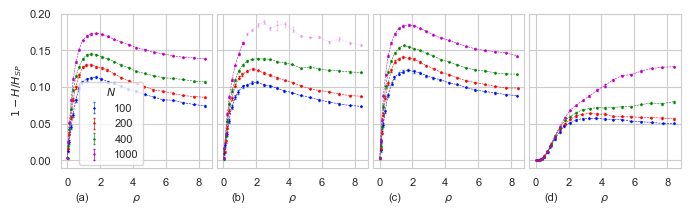

In [16]:
import matplotlib
matplotlib.rcParams.update({'text.usetex':usetex,'font.size':8})
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(8, 2),gridspec_kw={'wspace':0.03}, sharey=True)
cap = 1
markersize_ = 1
err_w = 0.5
alpha_number = 1

# First subplot ------------------------------------------------------------------------------
ax1.grid()
ax1.errorbar(2*list_of_Ms100*np.log(N100)/(N100*degree*np.log(degree)), final_tab_of_energies_GP100, yerr=final_tab_of_energies_GP100_std, fmt='+', color='b', ecolor='tab:blue',markersize=markersize_, capsize=cap, label='100', elinewidth=err_w)
ax1.errorbar(2*list_of_Ms200*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_GP200, yerr=final_tab_of_energies_GP200_std, fmt='+', color='r', ecolor='tab:red',markersize=markersize_, capsize=cap, label='200', elinewidth=err_w)
ax1.errorbar(2*list_of_Ms400*np.log(N400)/(N400*degree*np.log(degree)), final_tab_of_energies_GP400, yerr=final_tab_of_energies_GP400_std, fmt='+', color='g', ecolor='tab:green',markersize=markersize_, capsize=cap, label='400', elinewidth=err_w)
ax1.errorbar(2*list_of_Ms1000*np.log(N1000)/(N1000*degree*np.log(degree)), final_tab_of_energies_GP1000, yerr=final_tab_of_energies_GP1000_std, fmt='+', color='m', ecolor='m',markersize=markersize_, capsize=cap, label='1000', elinewidth=err_w)

line =0.4
ax1.plot(2*list_of_Ms100*np.log(N100)/(N100*degree*np.log(degree)), final_tab_of_energies_GP100, linestyle='--', color='b',linewidth=line)
ax1.plot(2*list_of_Ms200*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_GP200, linestyle='--', color='r',linewidth=line)
ax1.plot(2*list_of_Ms400*np.log(N400)/(N400*degree*np.log(degree)), final_tab_of_energies_GP400, linestyle='--', color='g',linewidth=line)
ax1.plot(2*list_of_Ms1000*np.log(N1000)/(N1000*degree*np.log(degree)), final_tab_of_energies_GP1000, linestyle='--', color='m',linewidth=line)


size_ = 15
ax1.set_xlabel(r'$\rho$')
ax1.set_ylabel(r'$1-H/H_{SP}$')
ax1.locator_params(axis='x', nbins=5)
ax1.locator_params(axis='y', nbins=6)
ax1.legend(title=r'$N$',loc=(0.12, 0.02))
ax1.set_ylim([-0.01,0.2])
ax1.grid()

# Second subplot ------------------------------------------------------------------------------

ax2.grid()
ax2.errorbar(2*list_of_Ms100*np.log(N100)/(N100*degree*np.log(degree)), final_tab_of_energies_BP100, yerr=final_tab_of_energies_BP100_std, fmt='+', color='b', ecolor='tab:blue',markersize=markersize_, capsize=cap, label='100', elinewidth=err_w)
ax2.errorbar(2*list_of_Ms200*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_BP200, yerr=final_tab_of_energies_BP200_std, fmt='+', color='r', ecolor='tab:red',markersize=markersize_, capsize=cap, label='200', elinewidth=err_w)
ax2.errorbar(2*list_of_Ms400*np.log(N400)/(N400*degree*np.log(degree)), final_tab_of_energies_BP400, yerr=final_tab_of_energies_BP400_std, fmt='+', color='g', ecolor='tab:green',markersize=markersize_, capsize=cap, label='400', elinewidth=err_w)
ax2.errorbar(2*list_of_Ms1000[:9]*np.log(N1000)/(N1000*degree*np.log(degree)), final_tab_of_energies_BP1000[:9], yerr=final_tab_of_energies_BP1000_std[:9], fmt='+', color='m', ecolor='m',markersize=markersize_, capsize=cap, label='1000', elinewidth=err_w)
ax2.errorbar(2*list_of_Ms1000[-len(final_tab_of_energies_BP1000)+8:]*np.log(N1000)/(N1000*degree*np.log(degree)), final_tab_of_energies_BP1000[-len(final_tab_of_energies_BP1000)+8:], yerr=final_tab_of_energies_BP1000_std[-len(final_tab_of_energies_BP1000)+8:], fmt='+',alpha = 0.2, color='m', ecolor='m',markersize=markersize_, capsize=cap, elinewidth=err_w)


line =0.4

ax2.plot(2*list_of_Ms100*np.log(N100)/(N100*degree*np.log(degree)), final_tab_of_energies_BP100, linestyle='--', color='b',linewidth=line)
ax2.plot(2*list_of_Ms200*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_BP200, linestyle='--', color='r',linewidth=line)
ax2.plot(2*list_of_Ms400*np.log(N400)/(N400*degree*np.log(degree)), final_tab_of_energies_BP400, linestyle='--', color='g',linewidth=line)
ax2.plot(2*list_of_Ms1000[:9]*np.log(N1000)/(N1000*degree*np.log(degree)), final_tab_of_energies_BP1000[:9], linestyle='--', color='m',linewidth=line)
ax2.plot(2*list_of_Ms1000[-len(final_tab_of_energies_BP1000)+8:]*np.log(N1000)/(N1000*degree*np.log(degree)), final_tab_of_energies_BP1000[-len(final_tab_of_energies_BP1000)+8:],alpha = 0.2, linestyle='--', color='m',linewidth=line)

size_ = 15
ax2.set_xlabel(r'$\rho$')
ax2.locator_params(axis='x', nbins=5)
ax2.locator_params(axis='y', nbins=6)
ax2.grid()
ax2.set_ylim([-0.01,0.2])

# Third subplot ------------------------------------------------------------------------------
ax3.grid()
ax3.errorbar(2*list_of_Ms100*np.log(N100)/(N100*degree*np.log(degree)), final_tab_of_energies_MCMC100, yerr=final_tab_of_energies_MCMC100_std, fmt='+', color='b', ecolor='tab:blue',markersize=markersize_, capsize=cap, label='N=100', elinewidth=err_w)
ax3.errorbar(2*list_of_Ms200*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_MCMC200, yerr=final_tab_of_energies_MCMC200_std, fmt='+', color='r', ecolor='tab:red',markersize=markersize_, capsize=cap, label='N=200', elinewidth=err_w)
ax3.errorbar(2*list_of_Ms400*np.log(N400)/(N400*degree*np.log(degree)), final_tab_of_energies_MCMC400, yerr=final_tab_of_energies_MCMC400_std, fmt='+', color='g', ecolor='tab:green',markersize=markersize_, capsize=cap, label='N=400', elinewidth=err_w)
ax3.errorbar(2*list_of_Ms1000*np.log(N1000)/(N1000*degree*np.log(degree)), final_tab_of_energies_MCMC1000, yerr=final_tab_of_energies_GP1000_std, fmt='+', color='m', ecolor='m',markersize=markersize_, capsize=cap, label='N=1000', elinewidth=err_w)


line =0.4
ax3.plot(2*list_of_Ms100*np.log(N100)/(N100*degree*np.log(degree)), final_tab_of_energies_MCMC100, linestyle='--', color='b',linewidth=line)
ax3.plot(2*list_of_Ms200*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_MCMC200, linestyle='--', color='r',linewidth=line)
ax3.plot(2*list_of_Ms400*np.log(N400)/(N400*degree*np.log(degree)), final_tab_of_energies_MCMC400, linestyle='--', color='g',linewidth=line)
ax3.plot(2*list_of_Ms1000*np.log(N1000)/(N1000*degree*np.log(degree)), final_tab_of_energies_MCMC1000, linestyle='--', color='m',linewidth=line)

size_ = 15
ax3.set_xlabel(r'$\rho$')
ax3.locator_params(axis='x', nbins=5)
ax3.locator_params(axis='y', nbins=6)
ax3.set_ylim([-0.01,0.2])
ax3.grid()

# Fourth subplot ------------------------------------------------------------------------------
ax4.grid()
ax4.errorbar(2*list_of_Ms100*np.log(N100)/(N100*degree*np.log(degree)), final_tab_of_energies_FW100, yerr=final_tab_of_energies_FW100_std, fmt='+', color='b', ecolor='tab:blue',markersize=markersize_, capsize=cap,alpha = alpha_number, label='N=100', elinewidth=err_w)
ax4.errorbar(2*list_of_Ms200*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_FW200, yerr=final_tab_of_energies_FW200_std, fmt='+', color='r', ecolor='tab:red',markersize=markersize_, capsize=cap,alpha = alpha_number, label='N=200', elinewidth=err_w)
ax4.errorbar(2*list_of_Ms400*np.log(N400)/(N400*degree*np.log(degree)), final_tab_of_energies_FW400, yerr=final_tab_of_energies_FW400_std, fmt='+', color='g', ecolor='tab:green',markersize=markersize_, capsize=cap,alpha = alpha_number, label='N=400', elinewidth=err_w)
ax4.errorbar(2*list_of_Ms1000*np.log(N1000)/(N1000*degree*np.log(degree)), final_tab_of_energies_FW1000, yerr=final_tab_of_energies_FW1000_std, fmt='+', color='m', ecolor='m',markersize=markersize_, capsize=cap,alpha = alpha_number, label='N=1000', elinewidth=err_w)

line =0.4
ax4.plot(2*list_of_Ms100*np.log(N100)/(N100*degree*np.log(degree)), final_tab_of_energies_FW100, linestyle='--', color='b',linewidth=line)
ax4.plot(2*list_of_Ms200*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_FW200, linestyle='--', color='r',linewidth=line)
ax4.plot(2*list_of_Ms400*np.log(N400)/(N400*degree*np.log(degree)), final_tab_of_energies_FW400, linestyle='--', color='g',linewidth=line)
ax4.plot(2*list_of_Ms1000*np.log(N1000)/(N1000*degree*np.log(degree)), final_tab_of_energies_FW1000, linestyle='--', color='m',linewidth=line)

size_ = 15
ax4.set_xlabel(r'$\rho$')
ax4.locator_params(axis='x', nbins=5)
ax4.locator_params(axis='y', nbins=6)
ax4.set_ylim([-0.01,0.2])
ax4.grid()

ax1.text(0.1, -0.16, "(a)", transform=ax1.transAxes, verticalalignment='top', horizontalalignment='left')
ax2.text(0.1, -0.16, "(b)", transform=ax2.transAxes, verticalalignment='top', horizontalalignment='left')
ax3.text(0.1, -0.16, "(c)", transform=ax3.transAxes, verticalalignment='top', horizontalalignment='left')
ax4.text(0.1, -0.16, "(d)", transform=ax4.transAxes, verticalalignment='top', horizontalalignment='left')
plt.savefig("results/pics/Figure_2.pdf", dpi=500, bbox_inches='tight')
plt.show()

# FIGURE 3

In [17]:
N = 200
Number_of_Ms = 25
degree_3 = 3

def round_to_even(values):
    rounded_values = [x if x % 2 == 0 else x - 1 for x in values]
    return rounded_values

# generate the m's
list_of_Ms3 = np.linspace(0,1,Number_of_Ms)
for m in range(len(list_of_Ms3)):
    list_of_Ms3[m] = list_of_Ms3[m]**2
list_of_Ms3 = (2*N*degree_3/np.log10(N))*list_of_Ms3
list_of_Ms3 = np.round(list_of_Ms3)
list_of_Ms3 = round_to_even(list_of_Ms3)
list_of_Ms3 = [num for num in list_of_Ms3 if num != 0] 
list_of_Ms3 = list(set(list_of_Ms3)) 
list_of_Ms3 = np.sort(list_of_Ms3)

In [18]:

final_tab_of_energies_FW3 = []
final_tab_of_energies_FW3_std = []

final_tab_of_energies_GP3 = []
final_tab_of_energies_GP3_std = []

final_tab_of_energies_MCMC3 = []
final_tab_of_energies_MCMC3_std = []

final_tab_of_energies_BP3 = []
final_tab_of_energies_BP3_std = []

for element_M in list_of_Ms3:
    element_M = math.floor(element_M)

    indices_FW = []
    energies_FW = []
    with open('results/data_6_first_figures/Figure_3_data/N200_d3/Results_new_FW_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_FW = columns[5]  # Indexing starts from 0
            third_column_FW = columns[3]
            indices_FW.append(third_column_FW)
            energies_FW.append(float(fifth_column_FW))

    data_FW = {
        'Seed': indices_FW,
        'ResultFW': energies_FW
    }

    indices_BP = []
    energies_BP = []
    with open('results/data_6_first_figures/Figure_3_data/N200_d3/Results_BP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_BP = columns[4]  # Indexing starts from 0
            third_column_BP = columns[3]
            indices_BP.append(third_column_BP)
            energies_BP.append(float(fifth_column_BP))

    data_BP = {
        'Seed': indices_BP,
        'ResultBP': energies_BP
    }
    indices_GP = []
    energies_GP = []
    with open('results/data_6_first_figures/Figure_3_data/N200_d3/Results_GP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_GP = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_GP.append(third_column)
            energies_GP.append(float(fifth_column_GP))

    data_GP = {
        'Seed': indices_GP,
        'ResultGP': energies_GP
    }

    indices_MCMC = []
    energies_MCMC = []
    with open('results/data_6_first_figures/Figure_3_data/N200_d3/Results_MCMC_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_MCMC = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_MCMC.append(third_column)
            energies_MCMC.append(float(fifth_column_MCMC))

    data_MCMC = {
        'Seed': indices_MCMC,
        'ResultMCMC': energies_MCMC
    }

    indices_SP = []
    energies_SP = []
    with open('results/data_6_first_figures/Figure_3_data/N200_d3/Results_SP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_SP = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_SP.append(third_column)
            energies_SP.append(float(fifth_column_SP))

    data_SP = {
        'Seed': indices_SP,
        'ResultSP': energies_SP
    }

    data_SP_ = pd.DataFrame(data_SP)
    data_GP_ = pd.DataFrame(data_GP)
    data_MCMC_ = pd.DataFrame(data_MCMC)
    data_BP_ = pd.DataFrame(data_BP)
    data_FW_ = pd.DataFrame(data_FW)
    merged_df1 = pd.merge(data_SP_, data_GP_, on='Seed')
    merged_df3 = pd.merge(merged_df1, data_BP_, on='Seed')
    merged_df = pd.merge(merged_df3, data_MCMC_, on='Seed')
    merged_df = pd.merge(merged_df, data_FW_, on='Seed')
    
    energies_GP = merged_df['ResultGP'].tolist()
    energies_SP = merged_df['ResultSP'].tolist()
    energies_BP = merged_df['ResultBP'].tolist()
    energies_MCMC = merged_df['ResultMCMC'].tolist()
    energies_FW = merged_df['ResultFW'].tolist()
    seeds = merged_df["Seed"].tolist()

    normalized_GP_energies = []
    for i in range(len(energies_GP)):
        normalized_GP_energies.append((energies_SP[i]-energies_GP[i]) / energies_SP[i])

    normalized_MCMC_energies = []
    for i in range(len(energies_MCMC)):
        normalized_MCMC_energies.append((energies_SP[i]-energies_MCMC[i]) / energies_SP[i])

    normalized_BP_energies = []
    for i in range(len(energies_BP)):
        normalized_BP_energies.append((energies_SP[i]-energies_BP[i]) / energies_SP[i])

    normalized_FW_energies = []
    for i in range(len(energies_FW)):
        normalized_FW_energies.append((energies_SP[i]-energies_FW[i]) / energies_SP[i])

    final_tab_of_energies_FW3.append(np.mean(normalized_FW_energies))
    final_tab_of_energies_FW3_std.append(np.std(normalized_FW_energies)/np.sqrt(len(normalized_FW_energies)))

    final_tab_of_energies_GP3.append(np.mean(normalized_GP_energies))
    final_tab_of_energies_GP3_std.append(np.std(normalized_GP_energies)/np.sqrt(len(normalized_GP_energies)))

    final_tab_of_energies_BP3.append(np.mean(normalized_BP_energies))
    final_tab_of_energies_BP3_std.append(np.std(normalized_BP_energies)/np.sqrt(len(normalized_BP_energies)))

    final_tab_of_energies_MCMC3.append(np.mean(normalized_MCMC_energies))
    final_tab_of_energies_MCMC3_std.append(np.std(normalized_MCMC_energies)/np.sqrt(len(normalized_MCMC_energies)))

In [19]:
N = 200
Number_of_Ms = 25
degree_6 = 6

def round_to_even(values):
    rounded_values = [x if x % 2 == 0 else x - 1 for x in values]
    return rounded_values

list_of_Ms6 = np.linspace(0,1,Number_of_Ms)
for m in range(len(list_of_Ms6)):
    list_of_Ms6[m] = list_of_Ms6[m]**2
list_of_Ms6 = (8.3916*N*degree_6*np.log(degree_6)/(2*np.log(N)))*list_of_Ms6
list_of_Ms6 = np.round(list_of_Ms6)
list_of_Ms6 = round_to_even(list_of_Ms6)
list_of_Ms6 = [num for num in list_of_Ms6 if num != 0] 
list_of_Ms6 = list(set(list_of_Ms6)) 
list_of_Ms6 = np.sort(list_of_Ms6)

In [20]:

final_tab_of_energies_FW6 = []
final_tab_of_energies_FW6_std = []

final_tab_of_energies_GP6 = []
final_tab_of_energies_GP6_std = []

final_tab_of_energies_MCMC6 = []
final_tab_of_energies_MCMC6_std = []

final_tab_of_energies_BP6 = []
final_tab_of_energies_BP6_std = []

for element_M in list_of_Ms6:
    element_M = math.floor(element_M)

    indices_FW = []
    energies_FW = []
    with open('results/data_6_first_figures/Figure_3_data/N200_d6/Results_new_FW_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_FW = columns[4]  # Indexing starts from 0
            third_column_FW = columns[3]
            indices_FW.append(third_column_FW)
            energies_FW.append(float(fifth_column_FW))

    data_FW = {
        'Seed': indices_FW,
        'ResultFW': energies_FW
    }
    
    indices_BP = []
    energies_BP = []
    with open('results/data_6_first_figures/Figure_3_data/N200_d6/Results_BP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_BP = columns[4]  # Indexing starts from 0
            third_column_BP = columns[3]
            indices_BP.append(third_column_BP)
            energies_BP.append(float(fifth_column_BP))

    data_BP = {
        'Seed': indices_BP,
        'ResultBP': energies_BP
    }
    

    indices_GP = []
    energies_GP = []
    with open('results/data_6_first_figures/Figure_3_data/N200_d6/Results_GP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_GP = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_GP.append(third_column)
            energies_GP.append(float(fifth_column_GP))

    data_GP = {
        'Seed': indices_GP,
        'ResultGP': energies_GP
    }

    indices_MCMC = []
    energies_MCMC = []
    with open('results/data_6_first_figures/Figure_3_data/N200_d6/Results_MCMC_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_MCMC = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_MCMC.append(third_column)
            energies_MCMC.append(float(fifth_column_MCMC))

    data_MCMC = {
        'Seed': indices_MCMC,
        'ResultMCMC': energies_MCMC
    }

    indices_SP = []
    energies_SP = []
    with open('results/data_6_first_figures/Figure_3_data/N200_d6/Results_SP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_SP = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_SP.append(third_column)
            energies_SP.append(float(fifth_column_SP))

    data_SP = {
        'Seed': indices_SP,
        'ResultSP': energies_SP
    }

    data_SP_ = pd.DataFrame(data_SP)
    data_GP_ = pd.DataFrame(data_GP)
    data_MCMC_ = pd.DataFrame(data_MCMC)
    data_BP_ = pd.DataFrame(data_BP)
    data_FW_ = pd.DataFrame(data_FW)
    merged_df2 = pd.merge(data_SP_, data_GP_, on='Seed')
    merged_df3 = pd.merge(merged_df2, data_BP_, on='Seed')
    merged_df = pd.merge(merged_df3, data_FW_, on='Seed')
    merged_df = pd.merge(merged_df, data_MCMC_, on='Seed')
    energies_GP = merged_df['ResultGP'].tolist()
    energies_SP = merged_df['ResultSP'].tolist()
    energies_BP = merged_df['ResultBP'].tolist()
    energies_FW = merged_df['ResultFW'].tolist()
    energies_MCMC = merged_df['ResultMCMC'].tolist()
    seeds = merged_df["Seed"].tolist()

    normalized_GP_energies = []
    for i in range(len(energies_GP)):
        normalized_GP_energies.append((energies_SP[i]-energies_GP[i]) / energies_SP[i])

    normalized_MCMC_energies = []
    for i in range(len(energies_MCMC)):
        normalized_MCMC_energies.append((energies_SP[i]-energies_MCMC[i]) / energies_SP[i])
    
    normalized_BP_energies = []
    for i in range(len(energies_BP)):
        normalized_BP_energies.append((energies_SP[i]-energies_BP[i]) / energies_SP[i])
    
    normalized_FW_energies = []
    for i in range(len(energies_FW)):
        normalized_FW_energies.append((energies_SP[i]-energies_FW[i]) / energies_SP[i])

    final_tab_of_energies_GP6.append(np.mean(normalized_GP_energies))
    final_tab_of_energies_GP6_std.append(np.std(normalized_GP_energies)/np.sqrt(len(normalized_GP_energies)))

    final_tab_of_energies_FW6.append(np.mean(normalized_FW_energies))
    final_tab_of_energies_FW6_std.append(np.std(normalized_FW_energies)/np.sqrt(len(normalized_FW_energies)))

    final_tab_of_energies_BP6.append(np.mean(normalized_BP_energies))
    final_tab_of_energies_BP6_std.append(np.std(normalized_BP_energies)/np.sqrt(len(normalized_BP_energies)))

    final_tab_of_energies_MCMC6.append(np.mean(normalized_MCMC_energies))
    final_tab_of_energies_MCMC6_std.append(np.std(normalized_MCMC_energies)/np.sqrt(len(normalized_MCMC_energies)))

In [21]:
N = 200
Number_of_Ms = 25
degree_12 = 12

def round_to_even(values):
    rounded_values = [x if x % 2 == 0 else x - 1 for x in values]
    return rounded_values

# generate the m's
list_of_Ms12 = np.linspace(0,1,Number_of_Ms)
for m in range(len(list_of_Ms12)):
    list_of_Ms12[m] = list_of_Ms12[m]**2
#list_of_Ms12 = (2*N*degree_12/np.log10(N))*list_of_Ms12
list_of_Ms12 = (8.3916*N*degree_12*np.log(degree_12)/(2*np.log(N)))*list_of_Ms12
list_of_Ms12 = np.round(list_of_Ms12)
list_of_Ms12 = round_to_even(list_of_Ms12)
list_of_Ms12 = [num for num in list_of_Ms12 if num != 0] 
list_of_Ms12 = list(set(list_of_Ms12))
list_of_Ms12 = np.sort(list_of_Ms12)

In [23]:
final_tab_of_energies_FW12 = []
final_tab_of_energies_FW12_std = []

final_tab_of_energies_GP12 = []
final_tab_of_energies_GP12_std = []

final_tab_of_energies_MCMC12 = []
final_tab_of_energies_MCMC12_std = []

final_tab_of_energies_BP12 = []
final_tab_of_energies_BP12_std = []


for element_M in list_of_Ms12:
    element_M = math.floor(element_M)

    indices_FW = []
    energies_FW = []
    with open('results/data_6_first_figures/Figure_3_data/N200_d12/Results_new_FW_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_FW = columns[5] 
            third_column = columns[3]
            indices_FW.append(third_column)
            energies_FW.append(float(fifth_column_FW))

    data_FW = {
        'Seed': indices_FW,
        'ResultFW': energies_FW
    }

    indices_BP = []
    energies_BP = []
    with open('results/data_6_first_figures/Figure_3_data/N200_d12/Results_BP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_BP = columns[4] 
            third_column_BP = columns[3]
            indices_BP.append(third_column_BP)
            energies_BP.append(float(fifth_column_BP))

    data_BP = {
        'Seed': indices_BP,
        'ResultBP': energies_BP
    }

    indices_GP = []
    energies_GP = []
    with open('results/data_6_first_figures/Figure_3_data/N200_d12/Results_GP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_GP = columns[4] 
            third_column = columns[3]
            indices_GP.append(third_column)
            energies_GP.append(float(fifth_column_GP))

    data_GP = {
        'Seed': indices_GP,
        'ResultGP': energies_GP
    }

    indices_MCMC = []
    energies_MCMC = []
    with open('results/data_6_first_figures/Figure_3_data/N200_d12/Results_MCMC_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_MCMC = columns[4] 
            third_column = columns[3]
            indices_MCMC.append(third_column)
            energies_MCMC.append(float(fifth_column_MCMC))

    data_MCMC = {
        'Seed': indices_MCMC,
        'ResultMCMC': energies_MCMC
    }

    indices_SP = []
    energies_SP = []
    with open('results/data_6_first_figures/Figure_3_data/N200_d12/Results_SP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_SP = columns[4]
            third_column = columns[3]
            indices_SP.append(third_column)
            energies_SP.append(float(fifth_column_SP))

    data_SP = {
        'Seed': indices_SP,
        'ResultSP': energies_SP
    }

    data_SP_ = pd.DataFrame(data_SP)
    data_FW_ = pd.DataFrame(data_FW)

    data_GP_ = pd.DataFrame(data_GP)
    data_MCMC_ = pd.DataFrame(data_MCMC)
    data_BP_ = pd.DataFrame(data_BP)
    merged_SP_GP = pd.merge(data_SP_, data_GP_, on='Seed')
    merged_SP_FW = pd.merge(data_SP_, data_FW_, on='Seed')
    merged_SP_BP_MCMC_ = pd.merge(data_SP_, data_MCMC_, on='Seed')
    merged_SP_BP_MCMC = pd.merge(merged_SP_BP_MCMC_, data_BP_, on='Seed')
    
    energies_SP_for_FW = merged_SP_FW['ResultSP'].tolist()
    energies_FW_for_FW = merged_SP_FW['ResultFW'].tolist()

    energies_SP_for_GP = merged_SP_GP['ResultSP'].tolist()
    energies_GP_for_GP = merged_SP_GP['ResultGP'].tolist()

    energies_SP_for_MCMC = merged_SP_BP_MCMC['ResultSP'].tolist()
    energies_MCMC_for_MCMC = merged_SP_BP_MCMC['ResultMCMC'].tolist()
    energies_BP_for_MCMC = merged_SP_BP_MCMC['ResultBP'].tolist()


    normalized_GP_energies = []
    for i in range(len(energies_SP_for_GP)):
        normalized_GP_energies.append((energies_SP_for_GP[i]-energies_GP_for_GP[i]) / energies_SP_for_GP[i])

    normalized_MCMC_energies = []
    for i in range(len(energies_SP_for_MCMC)):
        normalized_MCMC_energies.append((energies_SP_for_MCMC[i]-energies_MCMC_for_MCMC[i]) / energies_SP_for_MCMC[i])

    normalized_FW_energies = []
    for i in range(len(energies_SP_for_FW)):
        normalized_FW_energies.append((energies_SP_for_FW[i]-energies_FW_for_FW[i]) / energies_SP_for_FW[i])

    normalized_BP_energies = []
    for i in range(len(energies_SP_for_MCMC)):
        normalized_BP_energies.append((energies_SP_for_MCMC[i]-energies_BP_for_MCMC[i]) / energies_SP_for_MCMC[i])
    
    final_tab_of_energies_GP12.append(np.mean(normalized_GP_energies))
    final_tab_of_energies_GP12_std.append(np.std(normalized_GP_energies)/np.sqrt(len(normalized_GP_energies)))

    final_tab_of_energies_MCMC12.append(np.mean(normalized_MCMC_energies))
    final_tab_of_energies_MCMC12_std.append(np.std(normalized_MCMC_energies)/np.sqrt(len(normalized_MCMC_energies)))

    final_tab_of_energies_FW12.append(np.mean(normalized_FW_energies))
    final_tab_of_energies_FW12_std.append(np.std(normalized_FW_energies)/np.sqrt(len(normalized_FW_energies)))
  
    final_tab_of_energies_BP12.append(np.mean(normalized_BP_energies))
    final_tab_of_energies_BP12_std.append(np.std(normalized_BP_energies)/np.sqrt(len(normalized_BP_energies)))

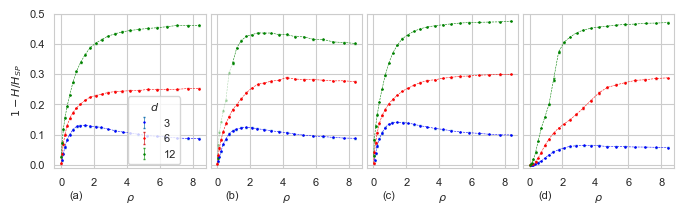

In [24]:
import matplotlib
matplotlib.rcParams.update({'text.usetex':usetex,'font.size':8})
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(8, 2),gridspec_kw={'wspace':0.03}, sharey=True)
capsize_ = 1
markersize_ = 1
err_w = 0.5
# First subplot ------------------------------------------------------------------------------
ax1.grid()
ax1.errorbar(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_GP3, yerr=final_tab_of_energies_GP3_std, fmt='+', color='b', ecolor='tab:blue', markersize = markersize_,capsize=capsize_, label='3', elinewidth=err_w)
ax1.errorbar(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_GP6, yerr=final_tab_of_energies_GP6_std, fmt='+', color='r', ecolor='tab:red', markersize = markersize_, capsize=capsize_, label='6', elinewidth=err_w)
ax1.errorbar(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_GP12, yerr=final_tab_of_energies_GP12_std, fmt='+', color='g', ecolor='tab:green', markersize = markersize_, capsize=capsize_, label='12', elinewidth=err_w)

line = 0.4
ax1.plot(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_GP3, linestyle='--', color='b', linewidth=line)
ax1.plot(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_GP6, linestyle='--', color='r', linewidth=line)
ax1.plot(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_GP12, linestyle='--', color='g', linewidth=line)

size_ = 15
ax1.set_xlabel(r'$\rho$')
ax1.set_ylabel(r'$1-H/H_{SP}$')
ax1.legend(title=r'$d$',bbox_to_anchor=(0.45, 0.5))
ax1.locator_params(axis='x', nbins=5)
ax1.locator_params(axis='y', nbins=6)
ax1.set_ylim([-0.01, 0.5])
ax1.grid()

# Second subplot ------------------------------------------------------------------------------

ax2.grid()
A_prime = [0,1,2,3,4,5,6,7]
A = [0,1,2,3,4,5,6]
A_aug = [A[i] for i in range(len(A)) if i not in [10]]

line =0.4
alpha_ptit = 0.3
df_here = pd.DataFrame({'list_of_Ms12': [list_of_Ms12[i] for i in A_prime],
                        'final_tab_of_energies_BP12': [final_tab_of_energies_BP12[i] for i in A_prime]})

df_nothere = pd.DataFrame({'list_of_Ms12': [list_of_Ms12[i] for i in range(len(list_of_Ms12)) if i not in A],
                           'final_tab_of_energies_BP12': [final_tab_of_energies_BP12[i] for i in range(len(final_tab_of_energies_BP12)) if i not in A]})

ax2.plot(2*df_here['list_of_Ms12']*np.log(N)/(N*degree_12*np.log(degree_12)), df_here['final_tab_of_energies_BP12'], linestyle='--', color='g', linewidth=line, alpha=alpha_ptit)
ax2.plot(2*df_nothere['list_of_Ms12']*np.log(N)/(N*degree_12*np.log(degree_12)), df_nothere['final_tab_of_energies_BP12'], linestyle='--', color='g', linewidth=line, alpha=1)


for i, (x, y, y_err) in enumerate(zip(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_BP12, final_tab_of_energies_BP12_std)):
    alpha = 1 if i not in A else 0.2  # Adjust transparency based on index
    ax2.errorbar(x, y, yerr=y_err, fmt='+', color='g', ecolor='tab:green', markersize = markersize_, capsize=capsize_, alpha=alpha, elinewidth=err_w)

ax2.errorbar(2*list_of_Ms12[:1]*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_BP12[:1], yerr=final_tab_of_energies_BP12_std[:1], fmt='+', color='g', ecolor='tab:green', markersize = markersize_, capsize=capsize_, alpha=1, elinewidth=err_w)

# Plotting other data
ax2.errorbar(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_BP3, yerr=final_tab_of_energies_BP3_std, fmt='+', color='b', ecolor='tab:blue', markersize = markersize_, capsize=capsize_, label='d=3', elinewidth=err_w)
ax2.errorbar(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_BP6, yerr=final_tab_of_energies_BP6_std, fmt='+', color='r', ecolor='tab:red', markersize = markersize_, capsize=capsize_, label='d=6', elinewidth=err_w)


# Plotting dashed lines
line = 0.4
ax2.plot(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_BP3, linestyle='--', color='b', linewidth=line)
ax2.plot(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_BP6, linestyle='--', color='r', linewidth=line)

size_ = 15
ax2.set_xlabel(r'$\rho$')
ax2.locator_params(axis='x', nbins=5)
ax2.locator_params(axis='y', nbins=6)
ax2.set_ylim([-0.01,0.5])
ax2.grid()

# Third subplot ------------------------------------------------------------------------------
ax3.grid()
ax3.errorbar(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_MCMC3, yerr=final_tab_of_energies_MCMC3_std, fmt='+', color='b', ecolor='tab:blue', markersize = markersize_, capsize=capsize_, label='d=3', elinewidth=err_w)
ax3.errorbar(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_MCMC6, yerr=final_tab_of_energies_MCMC6_std, fmt='+', color='r', ecolor='tab:red', markersize = markersize_, capsize=capsize_, label='d=6', elinewidth=err_w)
ax3.errorbar(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_MCMC12, yerr=final_tab_of_energies_MCMC12_std, fmt='+', color='g', ecolor='tab:green', markersize = markersize_, capsize=capsize_, label='d=12', elinewidth=err_w)

line = 0.4
ax3.plot(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_MCMC3, linestyle='--', color='b', linewidth=line)
ax3.plot(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_MCMC6, linestyle='--', color='r', linewidth=line)
ax3.plot(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_MCMC12, linestyle='--', color='g', linewidth=line)

size_ = 15
ax3.set_xlabel(r'$\rho$')
ax3.locator_params(axis='x', nbins=5)
ax3.locator_params(axis='y', nbins=6)
ax3.set_ylim([-0.01, 0.5])
ax3.grid()

# Fourth subplot ------------------------------------------------------------------------------
ax4.grid()
ax4.errorbar(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_FW3, yerr=final_tab_of_energies_FW3_std, fmt='+', color='b', ecolor='tab:blue', markersize = markersize_, capsize=capsize_, label='d=3', elinewidth=err_w)
ax4.errorbar(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_FW6, yerr=final_tab_of_energies_FW6_std, fmt='+', color='r', ecolor='tab:red', markersize = markersize_, capsize=capsize_, label='d=6', elinewidth=err_w)
ax4.errorbar(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_FW12, yerr=final_tab_of_energies_FW12_std, fmt='+', color='g', ecolor='tab:green', markersize = markersize_, capsize=capsize_, label='d=12', elinewidth=err_w)

line = 0.4
ax4.plot(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_FW3, linestyle='--', color='b', linewidth=line)
ax4.plot(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_FW6, linestyle='--', color='r', linewidth=line)
ax4.plot(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_FW12, linestyle='--', color='g', linewidth=line)

ax4.set_xlabel(r'$\rho$')
ax4.locator_params(axis='x', nbins=5)
ax4.locator_params(axis='y', nbins=6)
ax4.set_ylim([-0.01, 0.5])
ax4.grid()

ax1.text(0.1, -0.15, "(a)", transform=ax1.transAxes, verticalalignment='top', horizontalalignment='left')
ax2.text(0.1, -0.15, "(b)", transform=ax2.transAxes, verticalalignment='top', horizontalalignment='left')
ax3.text(0.1, -0.15, "(c)", transform=ax3.transAxes, verticalalignment='top', horizontalalignment='left')
ax4.text(0.1, -0.15, "(d)", transform=ax4.transAxes, verticalalignment='top', horizontalalignment='left')
plt.savefig("results/pics/Figure_3.pdf", dpi=500, bbox_inches='tight')
plt.show()

# FIGURE 4

In [25]:
# generate my list of M's : 
N = 500
Number_of_Ms = 25
degree = 3

def round_to_even(values):
    rounded_values = [x if x % 2 == 0 else x - 1 for x in values]
    return rounded_values

list_of_Ms_prime = np.linspace(0,1,Number_of_Ms)
for m in range(len(list_of_Ms_prime)):
    list_of_Ms_prime[m] = list_of_Ms_prime[m]**2
list_of_Ms = (2*N*degree/np.log10(N))*list_of_Ms_prime
list_of_Ms = np.round(list_of_Ms)
list_of_Ms = round_to_even(list_of_Ms)
list_of_Ms = [num for num in list_of_Ms if num != 0] 
list_of_Ms = list(set(list_of_Ms)) 
list_of_Ms = np.sort(list_of_Ms)


In [26]:
final_tab_of_energies_FW = []
final_tab_of_energies_FW_std = []

final_tab_of_energies_FW_int = []
final_tab_of_energies_FW_int_std = []

final_tab_of_energies_GP = []
final_tab_of_energies_GP_std = []

final_tab_of_energies_MCMC = []
final_tab_of_energies_MCMC_std = []

final_tab_of_energies_BP = []
final_tab_of_energies_BP_std = []

for element_M in list_of_Ms:
    element_M = math.floor(element_M)

    indices_FW = []
    energies_FW = []
    energies_FWint = []
    with open('results/data_6_first_figures/Figure_4_data/Results_N=500_d=3/Results_new_FW_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_FW = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_FW.append(third_column)
            energies_FW.append(float(fifth_column_FW))
            energies_FWint.append(float(columns[5]))

    data_FW = {
        'Seed': indices_FW,
        'ResultFW': energies_FW
    }

    data_FWint = {
        'Seed': indices_FW,
        'ResultFWint': energies_FWint
    }

    indices_BP = []
    energies_BP = []
    with open('results/data_6_first_figures/Figure_4_data/Results_N=500_d=3/Results_BP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_BP = columns[4]  # Indexing starts from 0
            third_column_BP = columns[3]
            indices_BP.append(third_column_BP)
            energies_BP.append(float(fifth_column_BP))

    data_BP = {
        'Seed': indices_BP,
        'ResultBP': energies_BP
    }


    indices_GP = []
    energies_GP = []
    with open('results/data_6_first_figures/Figure_4_data/Results_N=500_d=3/Results_GP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_GP = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_GP.append(third_column)
            energies_GP.append(float(fifth_column_GP))

    data_GP = {
        'Seed': indices_GP,
        'ResultGP': energies_GP
    }


    indices_MCMC = []
    energies_MCMC = []
    with open('results/data_6_first_figures/Figure_4_data/Results_N=500_d=3/Results_MCMC_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_MCMC = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_MCMC.append(third_column)
            energies_MCMC.append(float(fifth_column_MCMC))

    data_MCMC = {
        'Seed': indices_MCMC,
        'ResultMCMC': energies_MCMC
    }

    indices_SP = []
    energies_SP = []
    with open('results/data_6_first_figures/Figure_4_data/Results_N=500_d=3/Results_SP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_SP = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_SP.append(third_column)
            energies_SP.append(float(fifth_column_SP))

    data_SP = {
        'Seed': indices_SP,
        'ResultSP': energies_SP
    }

    data_SP_ = pd.DataFrame(data_SP)
    data_GP_ = pd.DataFrame(data_GP)
    data_FW_ = pd.DataFrame(data_FW)
    data_FWint_ = pd.DataFrame(data_FWint)
    data_MCMC_ = pd.DataFrame(data_MCMC)
    data_BP_ = pd.DataFrame(data_BP)
    merged_df1 = pd.merge(data_SP_, data_GP_, on='Seed')
    merged_df2 = pd.merge(merged_df1, data_FW_, on='Seed')
    merged_df3 = pd.merge(merged_df2, data_BP_, on='Seed')
    merged_df4 = pd.merge(merged_df3, data_FWint_, on='Seed')
    
    merged_df = pd.merge(merged_df4, data_MCMC_, on='Seed')

    energies_FW = merged_df['ResultFW'].tolist()
    energies_FWint = merged_df['ResultFWint'].tolist()
    energies_GP = merged_df['ResultGP'].tolist()
    energies_SP = merged_df['ResultSP'].tolist()
    energies_BP = merged_df['ResultBP'].tolist()
    energies_MCMC = merged_df['ResultMCMC'].tolist()
    seeds = merged_df["Seed"].tolist()

    normalized_GP_energies = []
    for i in range(len(energies_GP)):
        normalized_GP_energies.append((energies_SP[i]-energies_GP[i]) / energies_SP[i])

    normalized_MCMC_energies = []
    for i in range(len(energies_MCMC)):
        normalized_MCMC_energies.append((energies_SP[i]-energies_MCMC[i]) / energies_SP[i])

    normalized_BP_energies = []
    for i in range(len(energies_BP)):
        normalized_BP_energies.append((energies_SP[i]-energies_BP[i]) / energies_SP[i])

    normalized_FW_energies = []
    normalized_FWint_energies = []

    for i in range(len(energies_FW)):
        normalized_FW_energies.append((energies_SP[i]-energies_FW[i]) / energies_SP[i])
        normalized_FWint_energies.append((energies_SP[i]-energies_FWint[i]) / energies_SP[i])
        
    final_tab_of_energies_GP.append(np.mean(normalized_GP_energies))
    final_tab_of_energies_GP_std.append(np.std(normalized_GP_energies)/np.sqrt(len(normalized_GP_energies)))

    final_tab_of_energies_BP.append(np.mean(normalized_BP_energies))
    final_tab_of_energies_BP_std.append(np.std(normalized_BP_energies)/np.sqrt(len(normalized_BP_energies)))

    final_tab_of_energies_MCMC.append(np.mean(normalized_MCMC_energies))
    final_tab_of_energies_MCMC_std.append(np.std(normalized_MCMC_energies)/np.sqrt(len(normalized_MCMC_energies)))

    final_tab_of_energies_FW.append(np.mean(normalized_FW_energies))
    final_tab_of_energies_FW_std.append(np.std(normalized_FW_energies)/np.sqrt(len(normalized_FW_energies)))

    final_tab_of_energies_FW_int.append(np.mean(normalized_FWint_energies))
    final_tab_of_energies_FW_int_std.append(np.std(normalized_FWint_energies)/np.sqrt(len(normalized_FWint_energies)))

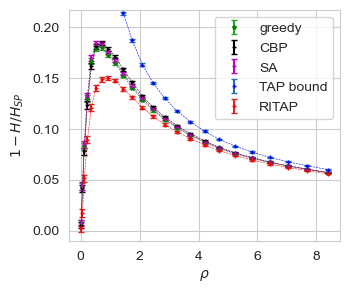

In [27]:
import matplotlib
matplotlib.rcParams.update({'text.usetex':usetex,'font.size':10})
plt.figure(figsize=(3.5, 3))
markersize_ = 3
list_of_Ms = np.array(list_of_Ms)

cap = 2
plt.grid()
plt.errorbar(2*list_of_Ms*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_GP, yerr=final_tab_of_energies_GP_std, fmt='*', color='g', ecolor='tab:green', markersize = markersize_, capsize=cap, label='greedy')
plt.errorbar(2*list_of_Ms*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_BP, yerr=final_tab_of_energies_BP_std, fmt='+', color='black', ecolor='black',markersize = markersize_,  capsize=cap, label='CBP')
plt.errorbar(2*list_of_Ms*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_MCMC, yerr=final_tab_of_energies_MCMC_std, fmt='+', color='m', ecolor='m', markersize = markersize_, capsize=cap, label='SA')
plt.errorbar(2*list_of_Ms*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_FW, yerr=final_tab_of_energies_FW_std, fmt='+', color='b', ecolor='tab:blue', markersize = markersize_, capsize=cap, label='TAP bound')
plt.errorbar(2*list_of_Ms*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_FW_int, yerr=final_tab_of_energies_FW_int_std, fmt='+', color='r', ecolor='tab:red',markersize = markersize_,  capsize=cap, label='RITAP')
line =0.4
plt.plot(2*list_of_Ms*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_GP, linestyle='--', color='g',linewidth=line)
plt.plot(2*list_of_Ms*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_BP, linestyle='--', color='black',linewidth=line)
plt.plot(2*list_of_Ms*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_MCMC, linestyle='--', color='m',linewidth=line)
plt.plot(2*list_of_Ms*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_FW, linestyle='--', color='b',linewidth=line)
plt.plot(2*list_of_Ms*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_FW_int, linestyle='--', color='r',linewidth=line)
size_ = 15
plt.xlabel(r'$\rho$')
plt.ylabel(r'$1-H/H_{SP}$')
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=6)
plt.legend()
plt.ylim([-0.01,0.217])
plt.grid()
plt.savefig("results/pics/Figure_4.pdf", bbox_inches='tight',dpi=500)
plt.show()

# FIGURE 5

In [28]:
N = 200
Number_of_Ms = 25
degree = 3

def round_to_even(values):
    rounded_values = [x if x % 2 == 0 else x - 1 for x in values]
    return rounded_values

list_of_Ms200 = np.linspace(0,1,Number_of_Ms)
for m in range(len(list_of_Ms200)):
    list_of_Ms200[m] = list_of_Ms200[m]**2
list_of_Ms200 = (2*N*degree/np.log10(N))*list_of_Ms200
list_of_Ms200 = np.round(list_of_Ms200)
list_of_Ms200 = round_to_even(list_of_Ms200)
list_of_Ms200 = [num for num in list_of_Ms200 if num != 0]
list_of_Ms200 = list(set(list_of_Ms200)) 
list_of_Ms200 = np.sort(list_of_Ms200)

In [29]:

final_tab_of_energies_FW200 = []
final_tab_of_energies_FW200_std = []

final_tab_of_energies_GP200 = []
final_tab_of_energies_GP200_std = []

final_tab_of_energies_MCMC200 = []
final_tab_of_energies_MCMC200_std = []

final_tab_of_energies_BP200 = []
final_tab_of_energies_BP200_std = []

for element_M in list_of_Ms200:
    element_M = math.floor(element_M)

    indices_FW = []
    energies_FW = []
    with open('results/data_6_first_figures/Figure_5_data/Results_d3_N200/Results_new_FW_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_FW = columns[5]  # Indexing starts from 0
            third_column = columns[3]
            indices_FW.append(third_column)
            energies_FW.append(float(fifth_column_FW))

    data_FW = {
        'Seed': indices_FW,
        'ResultFW': energies_FW
    }

    indices_BP = []
    energies_BP = []
    with open('results/data_6_first_figures/Figure_5_data/Results_d3_N200/Results_BP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_BP = columns[4]  # Indexing starts from 0
            third_column_BP = columns[3]
            indices_BP.append(third_column_BP)
            energies_BP.append(float(fifth_column_BP))

    data_BP = {
        'Seed': indices_BP,
        'ResultBP': energies_BP
    }

    indices_GP = []
    energies_GP = []
    with open('results/data_6_first_figures/Figure_5_data/Results_d3_N200/Results_GP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_GP = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_GP.append(third_column)
            energies_GP.append(float(fifth_column_GP))

    data_GP = {
        'Seed': indices_GP,
        'ResultGP': energies_GP
    }

    indices_MCMC = []
    energies_MCMC = []
    with open('results/data_6_first_figures/Figure_5_data/Results_d3_N200/Results_MCMC_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_MCMC = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_MCMC.append(third_column)
            energies_MCMC.append(float(fifth_column_MCMC))

    data_MCMC = {
        'Seed': indices_MCMC,
        'ResultMCMC': energies_MCMC
    }

    indices_SP = []
    energies_SP = []
    with open('results/data_6_first_figures/Figure_5_data/Results_d3_N200/Results_SP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_SP = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_SP.append(third_column)
            energies_SP.append(float(fifth_column_SP))

    data_SP = {
        'Seed': indices_SP,
        'ResultSP': energies_SP
    }

    data_SP_ = pd.DataFrame(data_SP)
    data_GP_ = pd.DataFrame(data_GP)
    data_FW_ = pd.DataFrame(data_FW)
    data_MCMC_ = pd.DataFrame(data_MCMC)
    data_BP_ = pd.DataFrame(data_BP)
    merged_df1 = pd.merge(data_SP_, data_GP_, on='Seed')
    merged_df2 = pd.merge(merged_df1, data_FW_, on='Seed')
    merged_df3 = pd.merge(merged_df2, data_BP_, on='Seed')

    merged_df = pd.merge(merged_df3, data_MCMC_, on='Seed')

    energies_FW = merged_df['ResultFW'].tolist()
    energies_GP = merged_df['ResultGP'].tolist()
    energies_SP = merged_df['ResultSP'].tolist()
    energies_BP = merged_df['ResultBP'].tolist()
    energies_MCMC = merged_df['ResultMCMC'].tolist()
    seeds = merged_df["Seed"].tolist()

    normalized_GP_energies = []
    for i in range(len(energies_GP)):
        normalized_GP_energies.append((energies_SP[i]-energies_GP[i]) / energies_SP[i])

    normalized_MCMC_energies = []
    for i in range(len(energies_MCMC)):
        normalized_MCMC_energies.append((energies_SP[i]-energies_MCMC[i]) / energies_SP[i])

    normalized_BP_energies = []
    for i in range(len(energies_BP)):
        normalized_BP_energies.append((energies_SP[i]-energies_BP[i]) / energies_SP[i])

    normalized_FW_energies = []
    for i in range(len(energies_FW)):
        normalized_FW_energies.append((energies_SP[i]-energies_FW[i]) / energies_SP[i])

    final_tab_of_energies_GP200.append(np.mean(normalized_GP_energies))
    final_tab_of_energies_GP200_std.append(np.std(normalized_GP_energies)/np.sqrt(len(normalized_GP_energies)))

    final_tab_of_energies_BP200.append(np.mean(normalized_BP_energies))
    final_tab_of_energies_BP200_std.append(np.std(normalized_BP_energies)/np.sqrt(len(normalized_BP_energies)))

    final_tab_of_energies_MCMC200.append(np.mean(normalized_MCMC_energies))
    final_tab_of_energies_MCMC200_std.append(np.std(normalized_MCMC_energies)/np.sqrt(len(normalized_MCMC_energies)))

    final_tab_of_energies_FW200.append(np.mean(normalized_FW_energies))
    final_tab_of_energies_FW200_std.append(np.std(normalized_FW_energies)/np.sqrt(len(normalized_FW_energies)))

In [30]:
N100 = 100
Number_of_Ms = 25
degree = 3

def round_to_even(values):
    rounded_values = [x if x % 2 == 0 else x - 1 for x in values]
    return rounded_values

list_of_Ms100 = np.linspace(0,1,Number_of_Ms)
for m in range(len(list_of_Ms100)):
    list_of_Ms100[m] = list_of_Ms100[m]**2
list_of_Ms100 = (2*N100*degree/np.log10(N100))*list_of_Ms100
list_of_Ms100 = np.round(list_of_Ms100)
list_of_Ms100 = round_to_even(list_of_Ms100)
list_of_Ms100 = [num for num in list_of_Ms100 if num != 0]  
list_of_Ms100 = list(set(list_of_Ms100))
list_of_Ms100 = np.sort(list_of_Ms100)

In [31]:

final_tab_of_energies_FW100 = []
final_tab_of_energies_FW100_std = []

final_tab_of_energies_GP100 = []
final_tab_of_energies_GP100_std = []

final_tab_of_energies_MCMC100 = []
final_tab_of_energies_MCMC100_std = []

final_tab_of_energies_BP100 = []
final_tab_of_energies_BP100_std = []

for element_M in list_of_Ms100:
    element_M = math.floor(element_M)

    indices_FW = []
    energies_FW = []
    with open('results/data_6_first_figures/Figure_5_data/Results_d3_N100/Results_new_FW_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_FW = columns[5] 
            third_column = columns[3]
            indices_FW.append(third_column)
            energies_FW.append(float(fifth_column_FW))

    data_FW = {
        'Seed': indices_FW,
        'ResultFW': energies_FW
    }

    indices_BP = []
    energies_BP = []
    with open('results/data_6_first_figures/Figure_5_data/Results_d3_N100/Results_BP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_BP = columns[4] 
            third_column_BP = columns[3]
            indices_BP.append(third_column_BP)
            energies_BP.append(float(fifth_column_BP))

    data_BP = {
        'Seed': indices_BP,
        'ResultBP': energies_BP
    }

    indices_GP = []
    energies_GP = []
    with open('results/data_6_first_figures/Figure_5_data/Results_d3_N100/Results_GP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_GP = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_GP.append(third_column)
            energies_GP.append(float(fifth_column_GP))

    data_GP = {
        'Seed': indices_GP,
        'ResultGP': energies_GP
    }

    indices_MCMC = []
    energies_MCMC = []
    with open('results/data_6_first_figures/Figure_5_data/Results_d3_N100/Results_MCMC_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_MCMC = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_MCMC.append(third_column)
            energies_MCMC.append(float(fifth_column_MCMC))

    data_MCMC = {
        'Seed': indices_MCMC,
        'ResultMCMC': energies_MCMC
    }

    indices_SP = []
    energies_SP = []
    with open('results/data_6_first_figures/Figure_5_data/Results_d3_N100/Results_SP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_SP = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_SP.append(third_column)
            energies_SP.append(float(fifth_column_SP))

    data_SP = {
        'Seed': indices_SP,
        'ResultSP': energies_SP
    }

    data_SP_ = pd.DataFrame(data_SP)
    data_GP_ = pd.DataFrame(data_GP)
    data_FW_ = pd.DataFrame(data_FW)
    data_MCMC_ = pd.DataFrame(data_MCMC)
    data_BP_ = pd.DataFrame(data_BP)
    merged_df1 = pd.merge(data_SP_, data_GP_, on='Seed')
    merged_df2 = pd.merge(merged_df1, data_FW_, on='Seed')
    merged_df3 = pd.merge(merged_df2, data_BP_, on='Seed')
    merged_df = pd.merge(merged_df3, data_MCMC_, on='Seed')

    energies_FW = merged_df['ResultFW'].tolist()
    energies_GP = merged_df['ResultGP'].tolist()
    energies_SP = merged_df['ResultSP'].tolist()
    energies_BP = merged_df['ResultBP'].tolist()
    energies_MCMC = merged_df['ResultMCMC'].tolist()
    seeds = merged_df["Seed"].tolist()

    normalized_GP_energies = []
    for i in range(len(energies_GP)):
        normalized_GP_energies.append((energies_SP[i]-energies_GP[i]) / energies_SP[i])

    normalized_MCMC_energies = []
    for i in range(len(energies_MCMC)):
        normalized_MCMC_energies.append((energies_SP[i]-energies_MCMC[i]) / energies_SP[i])

    normalized_BP_energies = []
    for i in range(len(energies_BP)):
        normalized_BP_energies.append((energies_SP[i]-energies_BP[i]) / energies_SP[i])

    normalized_FW_energies = []
    for i in range(len(energies_FW)):
        normalized_FW_energies.append((energies_SP[i]-energies_FW[i]) / energies_SP[i])

    final_tab_of_energies_GP100.append(np.mean(normalized_GP_energies))
    final_tab_of_energies_GP100_std.append(np.std(normalized_GP_energies)/np.sqrt(len(normalized_GP_energies)))

    final_tab_of_energies_BP100.append(np.mean(normalized_BP_energies))
    final_tab_of_energies_BP100_std.append(np.std(normalized_BP_energies)/np.sqrt(len(normalized_BP_energies)))

    final_tab_of_energies_MCMC100.append(np.mean(normalized_MCMC_energies))
    final_tab_of_energies_MCMC100_std.append(np.std(normalized_MCMC_energies)/np.sqrt(len(normalized_MCMC_energies)))

    final_tab_of_energies_FW100.append(np.mean(normalized_FW_energies))
    final_tab_of_energies_FW100_std.append(np.std(normalized_FW_energies)/np.sqrt(len(normalized_FW_energies)))

In [32]:
# generate my list of M's : 
N400 = 400
Number_of_Ms = 25
degree = 3

def round_to_even(values):
    rounded_values = [x if x % 2 == 0 else x - 1 for x in values]
    return rounded_values

list_of_Ms400 = np.linspace(0,1,Number_of_Ms)
for m in range(len(list_of_Ms400)):
    list_of_Ms400[m] = list_of_Ms400[m]**2
list_of_Ms400 = (2*N400*degree/np.log10(N400))*list_of_Ms400
list_of_Ms400 = np.round(list_of_Ms400)
list_of_Ms400 = round_to_even(list_of_Ms400)
list_of_Ms400 = [num for num in list_of_Ms400 if num != 0] 
list_of_Ms400 = list(set(list_of_Ms400)) 
list_of_Ms400 = np.sort(list_of_Ms400)

In [33]:

final_tab_of_energies_FW400 = []
final_tab_of_energies_FW400_std = []

final_tab_of_energies_GP400 = []
final_tab_of_energies_GP400_std = []

final_tab_of_energies_MCMC400 = []
final_tab_of_energies_MCMC400_std = []

final_tab_of_energies_BP400 = []
final_tab_of_energies_BP400_std = []

final_tab_of_energies_EGO400 = []
final_tab_of_energies_EGO400_std = []


for element_M in list_of_Ms400:
    element_M = math.floor(element_M)

    indices_FW = []
    energies_FW = []
    with open('results/data_6_first_figures/Figure_5_data/Results_d3_N400/Results_new_FW_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_FW = columns[5] 
            third_column = columns[3]
            indices_FW.append(third_column)
            energies_FW.append(float(fifth_column_FW))

    data_FW = {
        'Seed': indices_FW,
        'ResultFW': energies_FW
    }

    indices_BP = []
    energies_BP = []
    with open('results/data_6_first_figures/Figure_5_data/Results_d3_N400/Results_BP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_BP = columns[4] 
            third_column_BP = columns[3]
            indices_BP.append(third_column_BP)
            energies_BP.append(float(fifth_column_BP))

    data_BP = {
        'Seed': indices_BP,
        'ResultBP': energies_BP
    }

    indices_GP = []
    energies_GP = []
    with open('results/data_6_first_figures/Figure_5_data/Results_d3_N400/Results_GP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_GP = columns[4] 
            third_column = columns[3]
            indices_GP.append(third_column)
            energies_GP.append(float(fifth_column_GP))

    data_GP = {
        'Seed': indices_GP,
        'ResultGP': energies_GP
    }

    indices_MCMC = []
    energies_MCMC = []
    with open('results/data_6_first_figures/Figure_5_data/Results_d3_N400/Results_MCMC_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_MCMC = columns[4]
            third_column = columns[3]
            indices_MCMC.append(third_column)
            energies_MCMC.append(float(fifth_column_MCMC))

    data_MCMC = {
        'Seed': indices_MCMC,
        'ResultMCMC': energies_MCMC
    }

    indices_SP = []
    energies_SP = []
    with open('results/data_6_first_figures/Figure_5_data/Results_d3_N400/Results_SP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_SP = columns[4]
            third_column = columns[3]
            indices_SP.append(third_column)
            energies_SP.append(float(fifth_column_SP))

    data_SP = {
        'Seed': indices_SP,
        'ResultSP': energies_SP
    }

    data_SP_ = pd.DataFrame(data_SP)
    data_GP_ = pd.DataFrame(data_GP)
    data_FW_ = pd.DataFrame(data_FW)
    data_MCMC_ = pd.DataFrame(data_MCMC)
    data_BP_ = pd.DataFrame(data_BP)
    merged_df1 = pd.merge(data_SP_, data_GP_, on='Seed')
    merged_df2 = pd.merge(merged_df1, data_FW_, on='Seed')
    merged_df3 = pd.merge(merged_df2, data_BP_, on='Seed')
    merged_df = pd.merge(merged_df3, data_MCMC_, on='Seed')

    energies_FW = merged_df['ResultFW'].tolist()
    energies_GP = merged_df['ResultGP'].tolist()
    energies_SP = merged_df['ResultSP'].tolist()
    energies_BP = merged_df['ResultBP'].tolist()
    energies_MCMC = merged_df['ResultMCMC'].tolist()
    seeds = merged_df["Seed"].tolist()

    normalized_GP_energies = []
    for i in range(len(energies_GP)):
        normalized_GP_energies.append((energies_SP[i]-energies_GP[i]) / energies_SP[i])

    normalized_MCMC_energies = []
    for i in range(len(energies_MCMC)):
        normalized_MCMC_energies.append((energies_SP[i]-energies_MCMC[i]) / energies_SP[i])

    normalized_BP_energies = []
    for i in range(len(energies_BP)):
        normalized_BP_energies.append((energies_SP[i]-energies_BP[i]) / energies_SP[i])

    normalized_FW_energies = []
    for i in range(len(energies_FW)):
        normalized_FW_energies.append((energies_SP[i]-energies_FW[i]) / energies_SP[i])

    final_tab_of_energies_GP400.append(np.mean(normalized_GP_energies))
    final_tab_of_energies_GP400_std.append(np.std(normalized_GP_energies)/np.sqrt(len(normalized_GP_energies)))

    final_tab_of_energies_BP400.append(np.mean(normalized_BP_energies))
    final_tab_of_energies_BP400_std.append(np.std(normalized_BP_energies)/np.sqrt(len(normalized_BP_energies)))

    final_tab_of_energies_MCMC400.append(np.mean(normalized_MCMC_energies))
    final_tab_of_energies_MCMC400_std.append(np.std(normalized_MCMC_energies)/np.sqrt(len(normalized_MCMC_energies)))

    final_tab_of_energies_FW400.append(np.mean(normalized_FW_energies))
    final_tab_of_energies_FW400_std.append(np.std(normalized_FW_energies)/np.sqrt(len(normalized_FW_energies)))

In [34]:
N1000 = 1000
Number_of_Ms = 25
degree = 3

def round_to_even(values):
    rounded_values = [x if x % 2 == 0 else x - 1 for x in values]
    return rounded_values

list_of_Ms1000 = np.linspace(0,1,Number_of_Ms)
for m in range(len(list_of_Ms1000)):
    list_of_Ms1000[m] = list_of_Ms1000[m]**2
list_of_Ms1000 = (2*N1000*degree/np.log10(N1000))*list_of_Ms1000
list_of_Ms1000 = np.round(list_of_Ms1000)
list_of_Ms1000 = round_to_even(list_of_Ms1000)
list_of_Ms1000 = [num for num in list_of_Ms1000 if num != 0] 
list_of_Ms1000 = list(set(list_of_Ms1000))
list_of_Ms1000 = np.sort(list_of_Ms1000)

In [35]:
final_tab_of_energies_FW1000 = []
final_tab_of_energies_FW1000_std = []

final_tab_of_energies_GP1000 = []
final_tab_of_energies_GP1000_std = []

final_tab_of_energies_MCMC1000 = []
final_tab_of_energies_MCMC1000_std = []

final_tab_of_energies_BP1000 = []
final_tab_of_energies_BP1000_std = []

for element_M in list_of_Ms1000:
    element_M = math.floor(element_M)

    indices_FW = []
    energies_FW = []
    with open('results/data_6_first_figures/Figure_5_data/Results_d3_N1000/Results_new_FW_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_FW = columns[5] 
            third_column = columns[3]
            indices_FW.append(third_column)
            energies_FW.append(float(fifth_column_FW))

    data_FW = {
        'Seed': indices_FW,
        'ResultFW': energies_FW
    }

    indices_BP = []
    energies_BP = []
    with open('results/data_6_first_figures/Figure_5_data/Results_d3_N1000/Results_BP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_BP = columns[4] 
            third_column_BP = columns[3]
            indices_BP.append(third_column_BP)
            energies_BP.append(float(fifth_column_BP))

    data_BP = {
        'Seed': indices_BP,
        'ResultBP': energies_BP
    }

    indices_GP = []
    energies_GP = []
    with open('results/data_6_first_figures/Figure_5_data/Results_d3_N1000/Results_GP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_GP = columns[4] 
            third_column = columns[3]
            indices_GP.append(third_column)
            energies_GP.append(float(fifth_column_GP))

    data_GP = {
        'Seed': indices_GP,
        'ResultGP': energies_GP
    }


    indices_MCMC = []
    energies_MCMC = []
    with open('results/data_6_first_figures/Figure_5_data/Results_d3_N1000/Results_MCMC_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_MCMC = columns[4] 
            third_column = columns[3]
            indices_MCMC.append(third_column)
            energies_MCMC.append(float(fifth_column_MCMC))

    data_MCMC = {
        'Seed': indices_MCMC,
        'ResultMCMC': energies_MCMC
    }

    indices_SP = []
    energies_SP = []
    with open('results/data_6_first_figures/Figure_5_data/Results_d3_N1000/Results_SP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_SP = columns[4]
            third_column = columns[3]
            indices_SP.append(third_column)
            energies_SP.append(float(fifth_column_SP))

    data_SP = {
        'Seed': indices_SP,
        'ResultSP': energies_SP
    }

    data_SP_ = pd.DataFrame(data_SP)
    data_GP_ = pd.DataFrame(data_GP)
    data_FW_ = pd.DataFrame(data_FW)
    data_MCMC_ = pd.DataFrame(data_MCMC)
    data_BP_ = pd.DataFrame(data_BP)
    merged_GP = pd.merge(data_SP_, data_GP_, on='Seed')
    merged_FW = pd.merge(data_SP_, data_FW_, on='Seed')
    merged_BP = pd.merge(data_SP_, data_BP_, on='Seed')
    merged_MCMC = pd.merge(data_SP_, data_MCMC_, on='Seed')

    energies_FW = merged_FW['ResultFW'].tolist()
    energies_SP_de_FW = merged_FW['ResultSP'].tolist()
    energies_GP = merged_GP['ResultGP'].tolist()
    energies_SP_de_GP = merged_GP['ResultSP'].tolist()
    energies_BP = merged_BP['ResultBP'].tolist()
    energies_SP_de_BP = merged_BP['ResultSP'].tolist()
    energies_MCMC = merged_MCMC['ResultMCMC'].tolist()
    energies_SP_de_MCMC = merged_MCMC['ResultSP'].tolist()

    normalized_GP_energies = []
    for i in range(len(energies_GP)):
        normalized_GP_energies.append((energies_SP_de_GP[i]-energies_GP[i]) / energies_SP_de_GP[i])

    normalized_MCMC_energies = []
    for i in range(len(energies_MCMC)):
        normalized_MCMC_energies.append((energies_SP_de_MCMC[i]-energies_MCMC[i]) / energies_SP_de_MCMC[i])

    normalized_BP_energies = []
    for i in range(len(energies_BP)):
        normalized_BP_energies.append((energies_SP_de_BP[i]-energies_BP[i]) / energies_SP_de_BP[i])

    normalized_FW_energies = []
    for i in range(len(energies_FW)):
        normalized_FW_energies.append((energies_SP_de_FW[i]-energies_FW[i]) / energies_SP_de_FW[i])
 

    final_tab_of_energies_GP1000.append(np.mean(normalized_GP_energies))
    final_tab_of_energies_GP1000_std.append(np.std(normalized_GP_energies)/np.sqrt(len(normalized_GP_energies)))

    final_tab_of_energies_BP1000.append(np.mean(normalized_BP_energies))
    final_tab_of_energies_BP1000_std.append(np.std(normalized_BP_energies)/np.sqrt(len(normalized_BP_energies)))

    final_tab_of_energies_MCMC1000.append(np.mean(normalized_MCMC_energies))
    final_tab_of_energies_MCMC1000_std.append(np.std(normalized_MCMC_energies)/np.sqrt(len(normalized_MCMC_energies)))

    final_tab_of_energies_FW1000.append(np.mean(normalized_FW_energies))
    final_tab_of_energies_FW1000_std.append(np.std(normalized_FW_energies)/np.sqrt(len(normalized_FW_energies)))

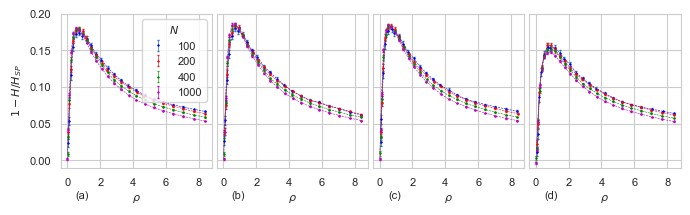

In [36]:
import matplotlib
matplotlib.rcParams.update({'text.usetex':usetex,'font.size':8})
fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(8, 2),gridspec_kw={'wspace':0.03}, sharey=True)
cap = 1
markersize_ = 1
err_w = 0.5
# First subplot ------------------------------------------------------------------------------

ax1.grid()
ax1.errorbar(2*list_of_Ms100*np.log(N100)/(N100*degree*np.log(degree)), final_tab_of_energies_GP100, yerr=final_tab_of_energies_GP100_std, fmt='+', color='b', ecolor='tab:blue', markersize = markersize_,capsize=cap, label='100', elinewidth=err_w)
ax1.errorbar(2*list_of_Ms200*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_GP200, yerr=final_tab_of_energies_GP200_std, fmt='+', color='r', ecolor='tab:red',markersize = markersize_, capsize=cap, label='200', elinewidth=err_w)
ax1.errorbar(2*list_of_Ms400*np.log(N400)/(N400*degree*np.log(degree)), final_tab_of_energies_GP400, yerr=final_tab_of_energies_GP400_std, fmt='+', color='g', ecolor='tab:green',markersize = markersize_, capsize=cap, label='400', elinewidth=err_w)
ax1.errorbar(2*list_of_Ms1000*np.log(N1000)/(N1000*degree*np.log(degree)), final_tab_of_energies_GP1000, yerr=final_tab_of_energies_GP1000_std, fmt='+', color='m', ecolor='m',markersize = markersize_, capsize=cap, label='1000', elinewidth=err_w)

line =0.4
ax1.plot(2*list_of_Ms100*np.log(N100)/(N100*degree*np.log(degree)), final_tab_of_energies_GP100, linestyle='--', color='b',linewidth=line)
ax1.plot(2*list_of_Ms200*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_GP200, linestyle='--', color='r',linewidth=line)
ax1.plot(2*list_of_Ms400*np.log(N400)/(N400*degree*np.log(degree)), final_tab_of_energies_GP400, linestyle='--', color='g',linewidth=line)
ax1.plot(2*list_of_Ms1000*np.log(N1000)/(N1000*degree*np.log(degree)), final_tab_of_energies_GP1000, linestyle='--', color='m',linewidth=line)

font=15
ax1.set_xlabel(r'$\rho$')
ax1.set_ylabel(r'$1-H/H_{SP}$')
ax1.set_ylim([-0.01,0.2])
ax1.locator_params(axis='x', nbins=5)
ax1.locator_params(axis='y', nbins=6)
ax1.legend(title=r'$N$')
ax1.grid()

# Second subplot ------------------------------------------------------------------------------

ax2.grid()
ax2.errorbar(2*list_of_Ms100*np.log(N100)/(N100*degree*np.log(degree)), final_tab_of_energies_BP100, yerr=final_tab_of_energies_BP100_std, fmt='+', color='b', ecolor='tab:blue',markersize = markersize_, capsize=cap, label='100', elinewidth=err_w)
ax2.errorbar(2*list_of_Ms200*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_BP200, yerr=final_tab_of_energies_BP200_std, fmt='+', color='r', ecolor='tab:red',markersize = markersize_, capsize=cap, label='200', elinewidth=err_w)
ax2.errorbar(2*list_of_Ms400*np.log(N400)/(N400*degree*np.log(degree)), final_tab_of_energies_BP400, yerr=final_tab_of_energies_BP400_std, fmt='+', color='g', ecolor='tab:green',markersize = markersize_, capsize=cap, label='400', elinewidth=err_w)
ax2.errorbar(2*list_of_Ms1000*np.log(N1000)/(N1000*degree*np.log(degree)), final_tab_of_energies_BP1000, yerr=final_tab_of_energies_BP1000_std, fmt='+', color='m', ecolor='m',markersize = markersize_, capsize=cap, label='1000', elinewidth=err_w)

line =0.4
ax2.plot(2*list_of_Ms100*np.log(N100)/(N100*degree*np.log(degree)), final_tab_of_energies_BP100, linestyle='--', color='b',linewidth=line)
ax2.plot(2*list_of_Ms200*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_BP200, linestyle='--', color='r',linewidth=line)
ax2.plot(2*list_of_Ms400*np.log(N400)/(N400*degree*np.log(degree)), final_tab_of_energies_BP400, linestyle='--', color='g',linewidth=line)
ax2.plot(2*list_of_Ms1000*np.log(N1000)/(N1000*degree*np.log(degree)), final_tab_of_energies_BP1000, linestyle='--', color='m',linewidth=line)

font=15
ax2.set_xlabel(r'$\rho$')
ax2.set_ylim([-0.01,0.2])
ax2.locator_params(axis='x', nbins=5)
ax2.locator_params(axis='y', nbins=6)
ax2.grid()

# Third subplot ------------------------------------------------------------------------------

ax3.grid()
ax3.errorbar(2*list_of_Ms100*np.log(N100)/(N100*degree*np.log(degree)), final_tab_of_energies_MCMC100, yerr=final_tab_of_energies_BP100_std, fmt='+', color='b', ecolor='tab:blue',markersize = markersize_, capsize=cap, label='100', elinewidth=err_w)
ax3.errorbar(2*list_of_Ms200*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_MCMC200, yerr=final_tab_of_energies_BP200_std, fmt='+', color='r', ecolor='tab:red',markersize = markersize_,capsize=cap, label='200', elinewidth=err_w)
ax3.errorbar(2*list_of_Ms400*np.log(N400)/(N400*degree*np.log(degree)), final_tab_of_energies_MCMC400, yerr=final_tab_of_energies_BP400_std, fmt='+', color='g', ecolor='tab:green',markersize = markersize_, capsize=cap, label='400', elinewidth=err_w)
ax3.errorbar(2*list_of_Ms1000*np.log(N1000)/(N1000*degree*np.log(degree)), final_tab_of_energies_MCMC1000, yerr=final_tab_of_energies_BP1000_std, fmt='+', color='m', ecolor='m',markersize = markersize_, capsize=cap, label='1000', elinewidth=err_w)

line =0.4
ax3.plot(2*list_of_Ms100*np.log(N100)/(N100*degree*np.log(degree)), final_tab_of_energies_MCMC100, linestyle='--', color='b',linewidth=line)
ax3.plot(2*list_of_Ms200*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_MCMC200, linestyle='--', color='r',linewidth=line)
ax3.plot(2*list_of_Ms400*np.log(N400)/(N400*degree*np.log(degree)), final_tab_of_energies_MCMC400, linestyle='--', color='g',linewidth=line)
ax3.plot(2*list_of_Ms1000*np.log(N1000)/(N1000*degree*np.log(degree)), final_tab_of_energies_MCMC1000, linestyle='--', color='m',linewidth=line)

font=15
ax3.set_xlabel(r'$\rho$')
ax3.set_ylim([-0.01,0.2])
ax3.locator_params(axis='x', nbins=5)
ax3.locator_params(axis='y', nbins=6)
ax3.grid()

# Fourth subplot ------------------------------------------------------------------------------

ax4.grid()
ax4.errorbar(2*list_of_Ms100*np.log(N100)/(N100*degree*np.log(degree)), final_tab_of_energies_FW100, yerr=final_tab_of_energies_FW100_std, fmt='+', color='b', ecolor='tab:blue',markersize = markersize_, capsize=cap, label='100', elinewidth=err_w)
ax4.errorbar(2*list_of_Ms200*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_FW200, yerr=final_tab_of_energies_FW200_std, fmt='+', color='r', ecolor='tab:red',markersize = markersize_, capsize=cap, label='200', elinewidth=err_w)
ax4.errorbar(2*list_of_Ms400*np.log(N400)/(N400*degree*np.log(degree)), final_tab_of_energies_FW400, yerr=final_tab_of_energies_FW400_std, fmt='+', color='g', ecolor='tab:green',markersize = markersize_, capsize=cap, label='400', elinewidth=err_w)
ax4.errorbar(2*list_of_Ms1000*np.log(N1000)/(N1000*degree*np.log(degree)), final_tab_of_energies_FW1000, yerr=final_tab_of_energies_FW1000_std, fmt='+', color='m', ecolor='m',markersize = markersize_, capsize=cap, label='1000', elinewidth=err_w)

line =0.4
ax4.plot(2*list_of_Ms100*np.log(N100)/(N100*degree*np.log(degree)), final_tab_of_energies_FW100, linestyle='--', color='b',linewidth=line)
ax4.plot(2*list_of_Ms200*np.log(N)/(N*degree*np.log(degree)), final_tab_of_energies_FW200, linestyle='--', color='r',linewidth=line)
ax4.plot(2*list_of_Ms400*np.log(N400)/(N400*degree*np.log(degree)), final_tab_of_energies_FW400, linestyle='--', color='g',linewidth=line)
ax4.plot(2*list_of_Ms1000*np.log(N1000)/(N1000*degree*np.log(degree)), final_tab_of_energies_FW1000, linestyle='--', color='m',linewidth=line)

font=15
ax4.set_xlabel(r'$\rho$')
ax4.set_ylim([-0.01,0.2])
ax4.locator_params(axis='x', nbins=5)
ax4.locator_params(axis='y', nbins=6)
ax4.grid()

ax1.text(0.1, -0.15, "(a)", transform=ax1.transAxes, verticalalignment='top', horizontalalignment='left')
ax2.text(0.1, -0.15, "(b)", transform=ax2.transAxes, verticalalignment='top', horizontalalignment='left')
ax3.text(0.1, -0.15, "(c)", transform=ax3.transAxes, verticalalignment='top', horizontalalignment='left')
ax4.text(0.1, -0.15, "(d)", transform=ax4.transAxes, verticalalignment='top', horizontalalignment='left')
plt.savefig("results/pics/Figure_5.pdf", dpi=500, bbox_inches='tight')
plt.show()

# FIGURE 6

In [37]:
N = 200
Number_of_Ms = 25
degree_3 = 3

def round_to_even(values):
    rounded_values = [x if x % 2 == 0 else x - 1 for x in values]
    return rounded_values

list_of_Ms3 = np.linspace(0,1,Number_of_Ms)
for m in range(len(list_of_Ms3)):
    list_of_Ms3[m] = list_of_Ms3[m]**2
list_of_Ms3 = (2*N*degree_3/np.log10(N))*list_of_Ms3
list_of_Ms3 = np.round(list_of_Ms3)
list_of_Ms3 = round_to_even(list_of_Ms3)
list_of_Ms3 = [num for num in list_of_Ms3 if num != 0] 
list_of_Ms3 = list(set(list_of_Ms3))
list_of_Ms3 = np.sort(list_of_Ms3)

In [38]:
final_tab_of_energies_FW3 = []
final_tab_of_energies_FW3_std = []

final_tab_of_energies_GP3 = []
final_tab_of_energies_GP3_std = []

final_tab_of_energies_MCMC3 = []
final_tab_of_energies_MCMC3_std = []

final_tab_of_energies_BP3 = []
final_tab_of_energies_BP3_std = []

final_tab_of_energies_FWcont3 = []
final_tab_of_energies_FWcont3_std = []

for element_M in list_of_Ms3:
    element_M = math.floor(element_M)

    indices_FW = []
    energies_FW = []
    energies_FWcont = []
    with open('results/data_6_first_figures/Figure_6_data/N200_d3/Results_new_FW_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_FW = columns[5]
            third_column = columns[3]
            sixth_column = columns[4] 
            indices_FW.append(third_column)
            energies_FW.append(float(fifth_column_FW))
            energies_FWcont.append(float(sixth_column))

    data_FW = {
        'Seed': indices_FW,
        'ResultFW': energies_FW,
        'ResultFWcont': energies_FWcont
    }

    indices_GP = []
    energies_GP = []
    with open('results/data_6_first_figures/Figure_6_data/N200_d3/Results_GP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_GP = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_GP.append(third_column)
            energies_GP.append(float(fifth_column_GP))

    data_GP = {
        'Seed': indices_GP,
        'ResultGP': energies_GP
    }

    indices_MCMC = []
    energies_MCMC = []
    with open('results/data_6_first_figures/Figure_6_data/N200_d3/Results_MCMC_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_MCMC = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_MCMC.append(third_column)
            energies_MCMC.append(float(fifth_column_MCMC))

    data_MCMC = {
        'Seed': indices_MCMC,
        'ResultMCMC': energies_MCMC
    }

    indices_SP = []
    energies_SP = []
    with open('results/data_6_first_figures/Figure_6_data/N200_d3/Results_SP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_SP = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_SP.append(third_column)
            energies_SP.append(float(fifth_column_SP))

    data_SP = {
        'Seed': indices_SP,
        'ResultSP': energies_SP
    }

    data_SP_ = pd.DataFrame(data_SP)
    data_FW_ = pd.DataFrame(data_FW)

    data_GP_ = pd.DataFrame(data_GP)
    data_MCMC_ = pd.DataFrame(data_MCMC)
    data_FWcont_ = pd.DataFrame(data_FW)    
    merged_SP_GP = pd.merge(data_SP_, data_GP_, on='Seed')
    merged_SP_FW = pd.merge(data_SP_, data_FW_, on='Seed')
    merged_SP_MCMC = pd.merge(data_SP_, data_MCMC_, on='Seed')

    energies_SP_for_FW = merged_SP_FW['ResultSP'].tolist()
    energies_FW_for_FW = merged_SP_FW['ResultFW'].tolist()
    energies_FW_for_FWcont = merged_SP_FW['ResultFWcont'].tolist()
    energies_SP_for_GP = merged_SP_GP['ResultSP'].tolist()
    energies_GP_for_GP = merged_SP_GP['ResultGP'].tolist()
    energies_SP_for_MCMC = merged_SP_MCMC['ResultSP'].tolist()
    energies_MCMC_for_MCMC = merged_SP_MCMC['ResultMCMC'].tolist()

    normalized_GP_energies = []
    for i in range(len(energies_GP)):
        normalized_GP_energies.append((energies_SP_for_GP[i]-energies_GP_for_GP[i]) / energies_SP_for_GP[i])

    normalized_MCMC_energies = []
    for i in range(len(energies_MCMC)):
        normalized_MCMC_energies.append((energies_SP_for_MCMC[i]-energies_MCMC_for_MCMC[i]) / energies_SP_for_MCMC[i])

    normalized_FW_energies = []
    normalized_FWcont_energies = []
    for i in range(len(energies_FW)):
        normalized_FW_energies.append((energies_SP_for_FW[i]-energies_FW_for_FW[i]) / energies_SP_for_FW[i])
        normalized_FWcont_energies.append((energies_SP_for_FW[i]-energies_FW_for_FWcont[i]) / energies_SP_for_FW[i])


    final_tab_of_energies_GP3.append(np.mean(normalized_GP_energies))
    final_tab_of_energies_GP3_std.append(np.std(normalized_GP_energies)/len(normalized_GP_energies))

    final_tab_of_energies_MCMC3.append(np.mean(normalized_MCMC_energies))
    final_tab_of_energies_MCMC3_std.append(np.std(normalized_MCMC_energies)/np.sqrt(len(normalized_MCMC_energies)))

    final_tab_of_energies_FW3.append(np.mean(normalized_FW_energies))
    final_tab_of_energies_FW3_std.append(np.std(normalized_FW_energies)/np.sqrt(len(normalized_FW_energies)))

    final_tab_of_energies_FWcont3.append(np.mean(normalized_FWcont_energies))
    final_tab_of_energies_FWcont3_std.append(np.std(normalized_FWcont_energies)/np.sqrt(len(normalized_FWcont_energies)))


In [39]:
# generate my list of M's : 
N = 200
Number_of_Ms = 25
degree_6 = 6

def round_to_even(values):
    rounded_values = [x if x % 2 == 0 else x - 1 for x in values]
    return rounded_values

list_of_Ms6 = np.linspace(0,1,Number_of_Ms)
for m in range(len(list_of_Ms6)):
    list_of_Ms6[m] = list_of_Ms6[m]**2
list_of_Ms6 = (8.3916*N*degree_6*np.log(degree_6)/(2*np.log(N)))*list_of_Ms6
list_of_Ms6 = np.round(list_of_Ms6)
list_of_Ms6 = round_to_even(list_of_Ms6)
list_of_Ms6 = [num for num in list_of_Ms6 if num != 0] 
list_of_Ms6 = list(set(list_of_Ms6)) 
list_of_Ms6 = np.sort(list_of_Ms6)

In [40]:

final_tab_of_energies_FW6 = []
final_tab_of_energies_FW6_std = []

final_tab_of_energies_GP6 = []
final_tab_of_energies_GP6_std = []

final_tab_of_energies_MCMC6 = []
final_tab_of_energies_MCMC6_std = []

final_tab_of_energies_BP6 = []
final_tab_of_energies_BP6_std = []

final_tab_of_energies_FWcont6 = []
final_tab_of_energies_FWcont6_std = []

for element_M in list_of_Ms6:
    element_M = math.floor(element_M)

    indices_FW = []
    energies_FW = []
    energies_FWcont = []
    with open('results/data_6_first_figures/Figure_6_data/N200_d6/Results_new_FW_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_FW = columns[5] 
            third_column = columns[3]
            sixth_column = columns[4] 
            indices_FW.append(third_column)
            energies_FW.append(float(fifth_column_FW))
            energies_FWcont.append(float(sixth_column))


    data_FW = {
        'Seed': indices_FW,
        'ResultFW': energies_FW,
        'ResultFWcont': energies_FWcont
    }


    indices_GP = []
    energies_GP = []
    with open('results/data_6_first_figures/Figure_6_data/N200_d6/Results_GP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_GP = columns[4] 
            third_column = columns[3]
            indices_GP.append(third_column)
            energies_GP.append(float(fifth_column_GP))

    data_GP = {
        'Seed': indices_GP,
        'ResultGP': energies_GP
    }

    indices_MCMC = []
    energies_MCMC = []
    with open('results/data_6_first_figures/Figure_6_data/N200_d6/Results_MCMC_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_MCMC = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_MCMC.append(third_column)
            energies_MCMC.append(float(fifth_column_MCMC))

    data_MCMC = {
        'Seed': indices_MCMC,
        'ResultMCMC': energies_MCMC
    }

    indices_SP = []
    energies_SP = []
    with open('results/data_6_first_figures/Figure_6_data/N200_d6/Results_SP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_SP = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_SP.append(third_column)
            energies_SP.append(float(fifth_column_SP))

    data_SP = {
        'Seed': indices_SP,
        'ResultSP': energies_SP
    }

    data_SP_ = pd.DataFrame(data_SP)
    data_FW_ = pd.DataFrame(data_FW)
    data_GP_ = pd.DataFrame(data_GP)
    data_MCMC_ = pd.DataFrame(data_MCMC)
    data_FWcont_ = pd.DataFrame(data_FW)
    merged_SP_GP = pd.merge(data_SP_, data_GP_, on='Seed')
    merged_SP_FW = pd.merge(data_SP_, data_FW_, on='Seed')
    merged_SP_MCMC = pd.merge(data_SP_, data_MCMC_, on='Seed')
    
    energies_SP_for_FW = merged_SP_FW['ResultSP'].tolist()
    energies_FW_for_FW = merged_SP_FW['ResultFW'].tolist()
    energies_FW_for_FWcont = merged_SP_FW['ResultFWcont'].tolist()
    energies_SP_for_GP = merged_SP_GP['ResultSP'].tolist()
    energies_GP_for_GP = merged_SP_GP['ResultGP'].tolist()
    energies_SP_for_MCMC = merged_SP_MCMC['ResultSP'].tolist()
    energies_MCMC_for_MCMC = merged_SP_MCMC['ResultMCMC'].tolist()

    normalized_GP_energies = []
    for i in range(len(energies_GP_for_GP)):
        normalized_GP_energies.append((energies_SP_for_GP[i]-energies_GP_for_GP[i]) / energies_SP_for_GP[i])

    normalized_MCMC_energies = []
    for i in range(len(energies_SP_for_MCMC)):
        normalized_MCMC_energies.append((energies_SP_for_MCMC[i]-energies_MCMC_for_MCMC[i]) / energies_SP_for_MCMC[i])

    normalized_FW_energies = []
    normalized_FWcont_energies = []
    for i in range(len(energies_FW_for_FW)):
        normalized_FW_energies.append((energies_SP_for_FW[i]-energies_FW_for_FW[i]) / energies_SP_for_FW[i])
        normalized_FWcont_energies.append((energies_SP_for_FW[i]-energies_FW_for_FWcont[i]) / energies_SP_for_FW[i])

    final_tab_of_energies_GP6.append(np.mean(normalized_GP_energies))
    final_tab_of_energies_GP6_std.append(np.std(normalized_GP_energies)/len(normalized_GP_energies))

    final_tab_of_energies_MCMC6.append(np.mean(normalized_MCMC_energies))
    final_tab_of_energies_MCMC6_std.append(np.std(normalized_MCMC_energies)/np.sqrt(len(normalized_MCMC_energies)))

    final_tab_of_energies_FW6.append(np.mean(normalized_FW_energies))
    final_tab_of_energies_FW6_std.append(np.std(normalized_FW_energies)/np.sqrt(len(normalized_FW_energies)))

    final_tab_of_energies_FWcont6.append(np.mean(normalized_FWcont_energies))
    final_tab_of_energies_FWcont6_std.append(np.std(normalized_FWcont_energies)/np.sqrt(len(normalized_FWcont_energies)))

In [41]:
N = 200
Number_of_Ms = 25
degree_12 = 12

def round_to_even(values):
    rounded_values = [x if x % 2 == 0 else x - 1 for x in values]
    return rounded_values

list_of_Ms12 = np.linspace(0,1,Number_of_Ms)
for m in range(len(list_of_Ms12)):
    list_of_Ms12[m] = list_of_Ms12[m]**2
list_of_Ms12 = (8.3916*N*degree_12*np.log(degree_12)/(2*np.log(N)))*list_of_Ms12
list_of_Ms12 = np.round(list_of_Ms12)
list_of_Ms12 = round_to_even(list_of_Ms12)
list_of_Ms12 = [num for num in list_of_Ms12 if num != 0] 
list_of_Ms12 = list(set(list_of_Ms12)) 
list_of_Ms12 = np.sort(list_of_Ms12)

In [42]:
final_tab_of_energies_FW12 = []
final_tab_of_energies_FW12_std = []

final_tab_of_energies_GP12 = []
final_tab_of_energies_GP12_std = []

final_tab_of_energies_MCMC12 = []
final_tab_of_energies_MCMC12_std = []

final_tab_of_energies_FWcont12 = []
final_tab_of_energies_FWcont12_std = []

for element_M in list_of_Ms12:
    element_M = math.floor(element_M)

    indices_FW = []
    energies_FW = []
    energies_FWcont = []
    with open('results/data_6_first_figures/Figure_6_data/N200_d12/Results_new_FW_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_FW = columns[5] 
            third_column = columns[3]
            sixth_column = columns[4] 
            indices_FW.append(third_column)
            energies_FW.append(float(fifth_column_FW))
            energies_FWcont.append(float(sixth_column))


    data_FW = {
        'Seed': indices_FW,
        'ResultFW': energies_FW,
        'ResultFWcont': energies_FWcont
    }

    indices_GP = []
    energies_GP = []
    with open('results/data_6_first_figures/Figure_6_data/N200_d12/Results_GP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_GP = columns[4]  
            third_column = columns[3]
            indices_GP.append(third_column)
            energies_GP.append(float(fifth_column_GP))

    data_GP = {
        'Seed': indices_GP,
        'ResultGP': energies_GP
    }

    indices_MCMC = []
    energies_MCMC = []
    with open('results/data_6_first_figures/Figure_6_data/N200_d12/Results_MCMC_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_MCMC = columns[4]  
            third_column = columns[3]
            indices_MCMC.append(third_column)
            energies_MCMC.append(float(fifth_column_MCMC))

    data_MCMC = {
        'Seed': indices_MCMC,
        'ResultMCMC': energies_MCMC
    }

    indices_SP = []
    energies_SP = []
    with open('results/data_6_first_figures/Figure_6_data/N200_d12/Results_SP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_SP = columns[4] 
            third_column = columns[3]
            indices_SP.append(third_column)
            energies_SP.append(float(fifth_column_SP))

    data_SP = {
        'Seed': indices_SP,
        'ResultSP': energies_SP
    }

    data_SP_ = pd.DataFrame(data_SP)
    data_FW_ = pd.DataFrame(data_FW)

    data_GP_ = pd.DataFrame(data_GP)
    data_MCMC_ = pd.DataFrame(data_MCMC)


    data_FWcont_ = pd.DataFrame(data_FW)
    merged_SP_GP = pd.merge(data_SP_, data_GP_, on='Seed')
    merged_SP_FW = pd.merge(data_SP_, data_FW_, on='Seed')
    merged_SP_MCMC = pd.merge(data_SP_, data_MCMC_, on='Seed')

    energies_SP_for_FW = merged_SP_FW['ResultSP'].tolist()
    energies_FW_for_FW = merged_SP_FW['ResultFW'].tolist()
    energies_FW_for_FWcont = merged_SP_FW['ResultFWcont'].tolist()
    energies_SP_for_GP = merged_SP_GP['ResultSP'].tolist()
    energies_GP_for_GP = merged_SP_GP['ResultGP'].tolist()
    energies_SP_for_MCMC = merged_SP_MCMC['ResultSP'].tolist()
    energies_MCMC_for_MCMC = merged_SP_MCMC['ResultMCMC'].tolist()


    normalized_GP_energies = []
    for i in range(len(energies_GP_for_GP)):
        normalized_GP_energies.append((energies_SP_for_GP[i]-energies_GP_for_GP[i]) / energies_SP_for_GP[i])

    normalized_MCMC_energies = []
    for i in range(len(energies_SP_for_MCMC)):
        normalized_MCMC_energies.append((energies_SP_for_MCMC[i]-energies_MCMC_for_MCMC[i]) / energies_SP_for_MCMC[i])

    normalized_FW_energies = []
    normalized_FWcont_energies = []
    for i in range(len(energies_FW_for_FW)):
        normalized_FW_energies.append((energies_SP_for_FW[i]-energies_FW_for_FW[i]) / energies_SP_for_FW[i])
        normalized_FWcont_energies.append((energies_SP_for_FW[i]-energies_FW_for_FWcont[i]) / energies_SP_for_FW[i])


    final_tab_of_energies_GP12.append(np.mean(normalized_GP_energies))
    final_tab_of_energies_GP12_std.append(np.std(normalized_GP_energies)/len(normalized_GP_energies))

    final_tab_of_energies_MCMC12.append(np.mean(normalized_MCMC_energies))
    final_tab_of_energies_MCMC12_std.append(np.std(normalized_MCMC_energies)/np.sqrt(len(normalized_MCMC_energies)))

    final_tab_of_energies_FW12.append(np.mean(normalized_FW_energies))
    final_tab_of_energies_FW12_std.append(np.std(normalized_FW_energies)/np.sqrt(len(normalized_FW_energies)))

    final_tab_of_energies_FWcont12.append(np.mean(normalized_FWcont_energies))
    final_tab_of_energies_FWcont12_std.append(np.std(normalized_FWcont_energies)/np.sqrt(len(normalized_FWcont_energies)))

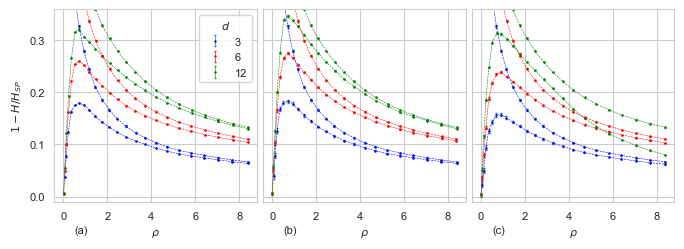

In [43]:
import matplotlib
matplotlib.rcParams.update({'text.usetex':usetex,'font.size':8})
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 2.5),gridspec_kw={'wspace':0.03}, sharey=True)
cap = 1
markersize_ = 1
err_w = 0.5
# First subplot ------------------------------------------------------------------------------
ax1.grid()
ax1.errorbar(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_GP3, yerr=final_tab_of_energies_GP3_std, fmt='+', color='b', ecolor='tab:blue',markersize=markersize_, capsize=cap, label='3', elinewidth=err_w)
ax1.errorbar(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_GP6, yerr=final_tab_of_energies_GP6_std, fmt='+', color='r', ecolor='tab:red',markersize=markersize_, capsize=cap, label='6', elinewidth=err_w)
ax1.errorbar(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_GP12, yerr=final_tab_of_energies_GP12_std, fmt='+', color='g', ecolor='tab:green',markersize=markersize_, capsize=cap, label='12', elinewidth=err_w)
line =0.4
ax1.plot(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_GP3, linestyle='--', color='b',linewidth=line)
ax1.plot(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_GP6, linestyle='--', color='r',linewidth=line)
ax1.plot(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_GP12, linestyle='--', color='g',linewidth=line)
alpha = 1
font = 15
ax1.errorbar(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_FWcont3, yerr=final_tab_of_energies_FWcont3_std,alpha=alpha, fmt='+', color='b',markersize=markersize_, ecolor='tab:blue', capsize=cap, elinewidth=err_w)
ax1.errorbar(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_FWcont6, yerr=final_tab_of_energies_FWcont6_std,alpha=alpha, fmt='+', color='r',markersize=markersize_, ecolor='tab:red', capsize=cap, elinewidth=err_w)
ax1.errorbar(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_FWcont12, yerr=final_tab_of_energies_FWcont12_std,alpha=alpha, fmt='+', color='g',markersize=markersize_, ecolor='tab:green', capsize=cap, elinewidth=err_w)
line =0.4
ax1.plot(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_FWcont3,alpha=alpha, linestyle='--', color='b',linewidth=line)
ax1.plot(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_FWcont6,alpha=alpha, linestyle='--', color='r',linewidth=line)
ax1.plot(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_FWcont12,alpha=alpha, linestyle='--', color='g',linewidth=line)

ax1.set_xlabel(r'$\rho$')
ax1.set_ylabel(r'$1-H/H_{SP}$')
ax1.locator_params(axis='x', nbins=5)
ax1.locator_params(axis='y', nbins=4)
ax1.legend(title=r'$d$')
ax1.set_ylim([-0.01,0.36])
ax1.grid()

# Second subplot ------------------------------------------------------------------------------
ax2.grid()
ax2.errorbar(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_MCMC3, yerr=final_tab_of_energies_MCMC3_std, fmt='+', color='b', ecolor='tab:blue',markersize=markersize_, capsize=cap, label='d=3', elinewidth=err_w)
ax2.errorbar(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_MCMC6, yerr=final_tab_of_energies_MCMC6_std, fmt='+', color='r', ecolor='tab:red',markersize=markersize_, capsize=cap, label='d=6', elinewidth=err_w)
ax2.errorbar(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_MCMC12, yerr=final_tab_of_energies_MCMC12_std, fmt='+', color='g', ecolor='tab:green',markersize=markersize_, capsize=cap, label='d=12', elinewidth=err_w)
line =0.4
ax2.plot(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_MCMC3, linestyle='--', color='b',linewidth=line)
ax2.plot(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_MCMC6, linestyle='--', color='r',linewidth=line)
ax2.plot(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_MCMC12, linestyle='--', color='g',linewidth=line)
alpha=1
ax2.errorbar(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_FWcont3, yerr=final_tab_of_energies_FWcont3_std,alpha=alpha, fmt='+', color='b',markersize=markersize_, ecolor='tab:blue', capsize=cap, elinewidth=err_w)
ax2.errorbar(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_FWcont6, yerr=final_tab_of_energies_FWcont6_std,alpha=alpha, fmt='+', color='r',markersize=markersize_, ecolor='tab:red', capsize=cap, elinewidth=err_w)
ax2.errorbar(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_FWcont12, yerr=final_tab_of_energies_FWcont12_std,alpha=alpha, fmt='+', color='g',markersize=markersize_, ecolor='tab:green', capsize=cap, elinewidth=err_w)
line =0.4
ax2.plot(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_FWcont3,alpha=alpha, linestyle='--', color='b',linewidth=line)
ax2.plot(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_FWcont6,alpha=alpha, linestyle='--', color='r',linewidth=line)
ax2.plot(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_FWcont12,alpha=alpha, linestyle='--', color='g',linewidth=line)

ax2.set_xlabel(r'$\rho$')
ax2.locator_params(axis='x', nbins=5)
ax2.locator_params(axis='y', nbins=4)
ax2.set_ylim([-0.01,0.36])
ax2.grid()

# Third subplot ------------------------------------------------------------------------------
ax3.grid()
ax3.errorbar(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_FW3, yerr=final_tab_of_energies_FW3_std, fmt='+', color='b', ecolor='tab:blue',markersize=markersize_, capsize=cap, label='d=3', elinewidth=err_w)
ax3.errorbar(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_FW6, yerr=final_tab_of_energies_FW6_std, fmt='+', color='r', ecolor='tab:red',markersize=markersize_, capsize=cap, label='d=6', elinewidth=err_w)
ax3.errorbar(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_FW12, yerr=final_tab_of_energies_FW12_std, fmt='+', color='g', ecolor='tab:green',markersize=markersize_, capsize=cap, label='d=12', elinewidth=err_w)
line =0.4
ax3.plot(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_FW3, linestyle='--', color='b',linewidth=line)
ax3.plot(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_FW6, linestyle='--', color='r',linewidth=line)
ax3.plot(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_FW12, linestyle='--', color='g',linewidth=line)
alpha=1
ax3.errorbar(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_FWcont3, yerr=final_tab_of_energies_FWcont3_std,alpha=alpha, fmt='+', color='b',markersize=markersize_, ecolor='tab:blue', capsize=cap, elinewidth=err_w)
ax3.errorbar(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_FWcont6, yerr=final_tab_of_energies_FWcont6_std,alpha=alpha, fmt='+', color='r',markersize=markersize_, ecolor='tab:red', capsize=cap, elinewidth=err_w)
ax3.errorbar(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_FWcont12, yerr=final_tab_of_energies_FWcont12_std,alpha=alpha, fmt='+', color='g',markersize=markersize_, ecolor='tab:green', capsize=cap, elinewidth=err_w)
line =0.4
ax3.plot(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_FWcont3,alpha=alpha, linestyle='--', color='b',linewidth=line)
ax3.plot(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_FWcont6,alpha=alpha, linestyle='--', color='r',linewidth=line)
ax3.plot(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_FWcont12,alpha=alpha, linestyle='--', color='g',linewidth=line)

ax3.set_xlabel(r'$\rho$')
ax3.locator_params(axis='x', nbins=5)
ax3.locator_params(axis='y', nbins=4)
ax3.set_ylim([-0.01,0.36])
ax3.grid()

ax1.text(0.1, -0.12, "(a)", transform=ax1.transAxes, verticalalignment='top', horizontalalignment='left')
ax2.text(0.1, -0.12, "(b)", transform=ax2.transAxes, verticalalignment='top', horizontalalignment='left')
ax3.text(0.1, -0.12, "(c)", transform=ax3.transAxes, verticalalignment='top', horizontalalignment='left')
plt.savefig("results/pics/Figure_6.pdf", dpi=500, bbox_inches='tight')
plt.show()